Notebook: 09 Adjust PRS by PCs or admixture

Look at the distribution of the updated Feb. 2021 PRS in alpha3 and compare adjustments using PCs, admixture, and BROAD method. Uses the genomewide PCs and estimated of admixture. Also, get random sample of unscreened controls by sampling from the PC space, to be used with the BROAD method. 

using 4 CPUs, 15 GB Tam, 100 GB Disk (Standard VM)



# Install libraries

In [1]:
rm(list=ls())

In [2]:
# remove 'sp' if I don't end up using it
my.packages <- c('data.table','Hmisc','tidyverse','ggplot2', 'stats', 'stringr','hexbin', 'sp', 'bigutilsr')
lapply(my.packages,
       function(pkg) { if(! pkg %in% installed.packages()) { install.packages(pkg)} } )
lapply(my.packages,library,character.only = TRUE)

Installing package into ‘/home/jupyter/packages’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘htmlTable’, ‘viridis’, ‘Formula’


Installing package into ‘/home/jupyter/packages’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/packages’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘doParallel’, ‘flock’, ‘RhpcBLASctl’, ‘DEoptimR’, ‘bigassertr’, ‘bigparallelr’, ‘nabor’, ‘robustbase’, ‘RSpectra’




[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ dplyr::src()       masks Hmisc::src()
✖ dplyr::summarize() masks Hmisc::summarize()
✖ purrr::transpose() masks data.table::transpose()


[[1]]
[1] "data.table" "stats"      "graphics"   "grDevices"  "utils"     
[6] "datasets"   "methods"    "base"      

[[2]]
[1] "Hmisc"      "data.table" "stats"      "graphics"   "grDevices" 
[6] "utils"      "datasets"   "methods"    "base"      

[[3]]
 [1] "forcats"    "stringr"    "dplyr"      "purrr"      "readr"     
 [6] "tidyr"      "tibble"     "ggplot2"    "tidyverse"  "Hmisc"     
[11] "data.table" "stats"      "graphics"   "grDevices"  "utils"     
[16] "datasets"   "methods"    "base"      

[[4]]
 [1] "forcats"    "stringr"    "dplyr"      "purrr"      "readr"     
 [6] "tidyr"      "tibble"     "ggplot2"    "tidyverse"  "Hmisc"     
[11] "data.table" "stats"      "graphics"   "grDevices"  "utils"     
[16] "datasets"   "methods"    "base"      

[[5]]
 [1] "forcats"    "stringr"    "dplyr"      "purrr"      "readr"     
 [6] "tidyr"      "tibble"     "ggplot2"    "tidyverse"  "Hmisc"     
[11] "data.table" "stats"      "graphics"   "grDevices"  "utils"     
[16] "datasets"   "methods"    "base"      

[[6]]
 [1] "forcats"    "stringr"    "dplyr"      "purrr"      "readr"     
 [6] "tidyr"      "tibble"     "ggplot2"    "tidyverse"  "Hmisc"     
[11] "data.table" "stats"      "graphics"   "grDevices"  "utils"     
[16] "datasets"   "methods"    "base"      

[[7]]
 [1] "hexbin"     "forcats"    "stringr"    "dplyr"      "purrr"     
 [6] "readr"      "tidyr"      "tibble"     "ggplot2"    "tidyverse" 
[11] "Hmisc"      "data.table" "stats"      "graphics"   "grDevices" 
[16] "utils"      "datasets"   "methods"    "base"      

[[8]]
 [1] "sp"         "hexbin"     "forcats"    "stringr"    "dplyr"     
 [6] "purrr"      "readr"      "tidyr"      "tibble"     "ggplot2"   
[11] "tidyverse"  "Hmisc"      "data.table" "stats"      "graphics"  
[16] "grDevices"  "utils"      "datasets"   "methods"    "base"      

[[9]]
 [1] "bigutilsr"  "sp"         "hexbin"     "forcats"    "stringr"   
 [6] "dplyr"      "purrr"      "readr"      "tidyr"      "tibble"    
[11] "ggplot2"    "tidyverse"  "Hmisc"      "data.table" "stats"     
[16] "graphics"   "grDevices"  "utils"      "datasets"   "methods"   
[21] "base"

In [3]:
sessionInfo()

R version 4.2.2 Patched (2022-11-10 r83330)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.3 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/liblapack.so.3

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] bigutilsr_0.3.4   sp_1.5-1          hexbin_1.28.2     forcats_0.5.2    
 [5] stringr_1.5.0     dplyr_1.0.10      purrr_0.3.5       readr_2.1.3      
 [9] tidyr_1.2.1       tibble_3.1.8      ggplot2_3.4.0     tidyverse_1.3.2  
[13] Hmi

# Functions used in this notebook

In [4]:
addparentheses <- function(x){paste0("(", x, ")")}
model.table <- function(sum.model)
    {
    fit.check.dt <- data.table(cbind(rownames(sum.model$coef),sum.model$coef[,c(1,2,4)]))
    setnames(fit.check.dt,c("Var","beta","std.error","pvalue"))
    fit.check.dt[,beta:=round(as.numeric(beta),digits=3)]
    fit.check.dt[,std.error:=round(as.numeric(std.error),digits=3)]
    fit.check.dt[,pvalue:=format(as.numeric(pvalue),scientific = TRUE, digits=2)]
    list(fit.check.dt)
}

In [5]:
broad.adjust <- function(data.pred,data.apply){
    # data.pred == data set to train on ; data.apply == data to apply the adjustment to
    fit.ref <- lm(PRS ~ PC1 + PC2 + PC3 + PC4 + PC5,data=data.pred)
    data.pred[,resid2:=resid(fit.ref)^2]
    fit.pop.var <- glm(resid2 ~ PC1 + PC2 + PC3 + PC4 + PC5, data=data.pred, family="gaussian")
    prs.predicted <- predict(fit.ref, data.apply)
    PRS.adjusted2 <-  ( (data.apply$PRS - prs.predicted) / sqrt(predict(fit.pop.var, data.apply)) )
    list(PRS.adjusted2, summary(fit.ref))
}

In [6]:
broad.adjust.anc <- function(data.pred,data.apply){
    # data.pred == data set to train on ; data.apply == data to apply the adjustment to
    fit.ref <- lm(PRS ~  AFR + AMR + EAS + MID + SAS,data=data.pred)
    data.pred[,resid2:=resid(fit.ref)^2]
    fit.pop.var <- glm(resid2 ~  AFR + AMR + EAS + MID + SAS, data=data.pred, family="gaussian")
    prs.predicted <- predict(fit.ref, data.apply)
    PRS.adjusted2 <-  ( (data.apply$PRS - prs.predicted) / sqrt(predict(fit.pop.var, data.apply)) )
    list(PRS.adjusted2, summary(fit.ref))
}

# Load data

In [7]:
# Get Raw PRS
infile <- "total-LDpres.prs.csv"
#cp.command <- paste0("gsutil -m cp -r gs://fc-secure-30fdbdfd-a46b-406d-9617-1bc69ae1da9d/alpha3/",infile," .")
cp.command <- paste0("gsutil -m cp -r gs://fc-secure-91b7b957-58d8-4142-b93b-c3a2635f2d78/alpha3/",infile," .")
system(cp.command, intern=TRUE)

character(0)

In [8]:
prs.dt <- fread(infile)
describe(prs.dt) # The distributin of PRS looks appropriate.

prs.dt 

 2  Variables      98622  Observations
--------------------------------------------------------------------------------
ID 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   98622        0    98622        1  2109763  1007490  1082592  1167547 
     .25      .50      .75      .90      .95 
 1422497  1841526  2560397  3215596  3431237 

lowest : 1000004 1000033 1000042 1000091 1000095
highest: 9991636 9992998 9993207 9995407 9997756
--------------------------------------------------------------------------------
PRS 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   98622        0    98622        1    0.341   0.5232 -0.42284 -0.25213 
     .25      .50      .75      .90      .95 
 0.02715  0.34229  0.65379  0.93243  1.10226 

lowest : -1.830499 -1.739795 -1.692679 -1.583401 -1.569621
highest:  2.164760  2.286316  2.289710  2.297082  2.315605
--------------------------------------------------------------------------------

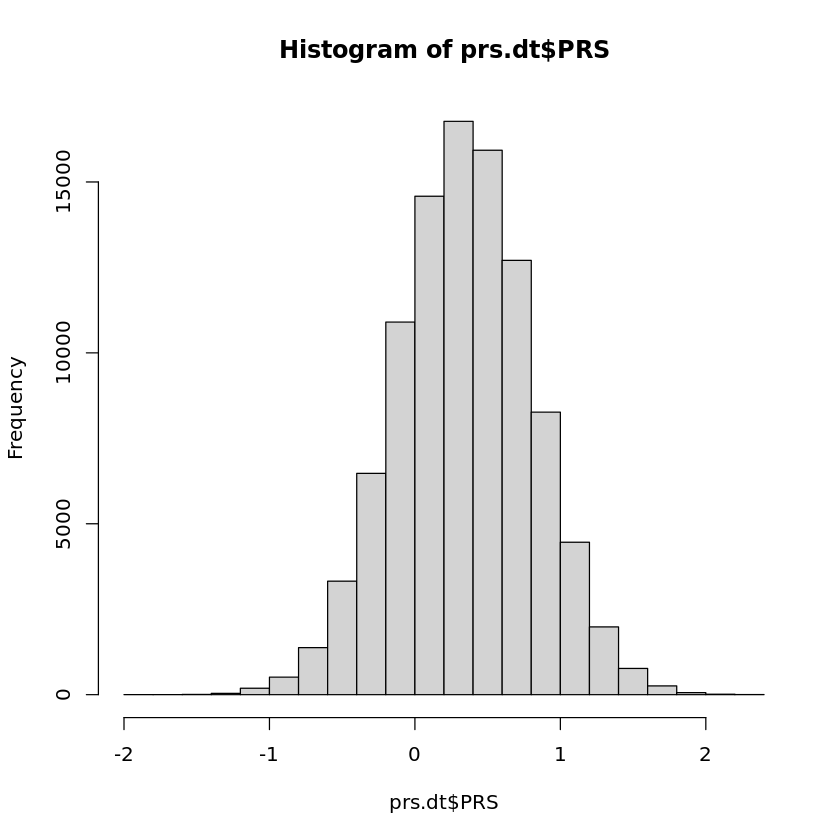

In [9]:
hist(prs.dt$PRS)

In [10]:
# Get case/control data
infile <- "CRC-case-control-phekb-2022-10-17.tsv"
#cp.command <- paste0("gsutil -m cp -r  gs://fc-secure-30fdbdfd-a46b-406d-9617-1bc69ae1da9d/",infile," .")
cp.command <- paste0("gsutil -m cp -r gs://fc-secure-91b7b957-58d8-4142-b93b-c3a2635f2d78/",infile," .")
system(cp.command)

In [ ]:
# read in case/control data
crc.dt <- fread(infile)
str(crc.dt)
length(crc.dt$person_id)
length(unique(crc.dt$person_id))

In [12]:
# Get GW PCs
infile <- "myPCA-2023-02-13.csv"
#cp.command <- paste0("gsutil -m cp -r gs://fc-secure-30fdbdfd-a46b-406d-9617-1bc69ae1da9d/data/PCSNPS/",infile," .")
cp.command <- paste0("gsutil -m cp -r gs://fc-secure-91b7b957-58d8-4142-b93b-c3a2635f2d78/data/PCSNPS/",infile," .")
system(cp.command, intern=TRUE)

character(0)

In [13]:
mypcs.dt <- fread(infile)
str(mypcs.dt)

Classes ‘data.table’ and 'data.frame':	102773 obs. of  33 variables:
 $ person_id: chr  "CHMI_CHMI3_WGS2" "HG00096" "HG00097" "HG00099" ...
 $ PC1      : num  -0.00954 -0.01021 -0.01026 -0.01024 -0.01014 ...
 $ PC2      : num  -0.0204 -0.0215 -0.0217 -0.021 -0.0215 ...
 $ PC3      : num  -0.00114 0.00134 0.00124 0.0017 0.00132 ...
 $ PC4      : num  -0.014 -0.0172 -0.0165 -0.0157 -0.0161 ...
 $ PC5      : num  -0.000563 -0.000296 -0.000466 -0.000824 -0.000626 ...
 $ PC6      : num  -0.00022 -0.003 -0.00236 -0.00264 -0.00231 ...
 $ PC7      : num  0.00392 -0.02494 -0.02476 -0.02493 -0.02105 ...
 $ PC8      : num  -0.00073 -0.002408 -0.000727 -0.000677 -0.000988 ...
 $ PC9      : num  0.000926 -0.004832 -0.005205 -0.004052 -0.005844 ...
 $ PC10     : num  0.00288 -0.00519 -0.0047 -0.00335 -0.00269 ...
 $ PC11     : num  0.000651 0.000711 0.000594 0.000371 0.001238 ...
 $ PC12     : num  -0.000398 0.000687 0.001321 -0.000439 0.000744 ...
 $ PC13     : num  0.00227 -0.001145 0.001199 0.000

In [14]:
# Get GW admixture
# copy over all the admixture file
infile <- "admixture_aou0"
#(cp.command <- paste0("gsutil -m cp -r gs://fc-secure-30fdbdfd-a46b-406d-9617-1bc69ae1da9d/data/PCSNPS/",infile,"*.csv ."))
(cp.command <- paste0("gsutil -m cp -r gs://fc-secure-91b7b957-58d8-4142-b93b-c3a2635f2d78/data/PCSNPS/",infile,"*.csv ."))
system(cp.command)

[1] "gsutil -m cp -r gs://fc-secure-30fdbdfd-a46b-406d-9617-1bc69ae1da9d/data/PCSNPS/admixture_aou0*.csv ."

In [15]:
outfile <- "admixture_aou_all.csv"
(cat.cmd <- paste0("cat ",infile,"*.csv > ",outfile))
system(cat.cmd)

[1] "cat admixture_aou0*.csv > admixture_aou_all.csv"

In [ ]:
admix.dt <- fread(outfile)
str(admix.dt)

In [ ]:
# merge the data
setnames(admix.dt,"ID","person_id")
setkey(admix.dt,"person_id")
setkey(mypcs.dt,"person_id")
merge.dt <- mypcs.dt[admix.dt]
str(merge.dt)

In [18]:
#make admixture estimates numeric. Since the header line is repeated, they are read in as characters
merge.dt[,AFR:=as.numeric(AFR)]
merge.dt[,AMR:=as.numeric(AMR)]
merge.dt[,EAS:=as.numeric(EAS)]
merge.dt[,EUR:=as.numeric(EUR)]
merge.dt[,MID:=as.numeric(MID)]
merge.dt[,SAS:=as.numeric(SAS)]


Warning message in eval(jsub, SDenv, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(jsub, SDenv, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(jsub, SDenv, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(jsub, SDenv, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(jsub, SDenv, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(jsub, SDenv, parent.frame()):
“NAs introduced by coercion”


In [ ]:
#merge with the PRS.dt
prs.dt[,"person_id":=as.character(ID)]
setkey(prs.dt,"person_id")
setkey(merge.dt,"person_id")
merge2.dt <- merge.dt[prs.dt]
str(merge2.dt)

In [ ]:
# merge with CRC data
crc.dt[,person_id:=as.character(person_id)]
setkey(crc.dt,"person_id")
setkey(merge2.dt,"person_id")
merge2.dt <- merge2.dt[crc.dt]
str(merge2.dt)

In [21]:
# pull in reference PRS data
infile <- "total-LDpres.prs.csv"
#cp.command <- paste0("gsutil -m cp -r gs://fc-secure-30fdbdfd-a46b-406d-9617-1bc69ae1da9d/data/reference/",infile," .")
cp.command <- paste0("gsutil -m cp -r gs://fc-secure-91b7b957-58d8-4142-b93b-c3a2635f2d78/data/reference/",infile," .")
system(cp.command, intern=TRUE)
ref.prs.dt <- fread(infile)
describe(ref.prs.dt)

character(0)

ref.prs.dt 

 2  Variables      4151  Observations
--------------------------------------------------------------------------------
ID 
       n  missing distinct 
    4151        0     4151 

lowest : CHMI_CHMI3_WGS2 HG00096         HG00097         HG00099         HG00100        
highest: SS6004471       SS6004473       SS6004474       SS6004475       SS6004476      
--------------------------------------------------------------------------------
PRS 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    4151        0     4151        1   0.3433   0.5138 -0.41083 -0.23518 
     .25      .50      .75      .90      .95 
 0.04223  0.34463  0.64944  0.92137  1.07824 

lowest : -1.796180 -1.367913 -1.262686 -1.186733 -1.124608
highest:  1.708719  1.763659  1.765952  1.770459  1.797683
--------------------------------------------------------------------------------

In [22]:
ref.prs.dt <- fread(infile)
describe(ref.prs.dt)

ref.prs.dt 

 2  Variables      4151  Observations
--------------------------------------------------------------------------------
ID 
       n  missing distinct 
    4151        0     4151 

lowest : CHMI_CHMI3_WGS2 HG00096         HG00097         HG00099         HG00100        
highest: SS6004471       SS6004473       SS6004474       SS6004475       SS6004476      
--------------------------------------------------------------------------------
PRS 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    4151        0     4151        1   0.3433   0.5138 -0.41083 -0.23518 
     .25      .50      .75      .90      .95 
 0.04223  0.34463  0.64944  0.92137  1.07824 

lowest : -1.796180 -1.367913 -1.262686 -1.186733 -1.124608
highest:  1.708719  1.763659  1.765952  1.770459  1.797683
--------------------------------------------------------------------------------

In [23]:
#merge with PC data
setnames(ref.prs.dt,"ID","person_id")
setkey(ref.prs.dt,"person_id")
setkey(mypcs.dt,"person_id")
ref.merge.dt <- mypcs.dt[ref.prs.dt]
str(ref.merge.dt)

Classes ‘data.table’ and 'data.frame':	4151 obs. of  34 variables:
 $ person_id: chr  "CHMI_CHMI3_WGS2" "HG00096" "HG00097" "HG00099" ...
 $ PC1      : num  -0.00954 -0.01021 -0.01026 -0.01024 -0.01014 ...
 $ PC2      : num  -0.0204 -0.0215 -0.0217 -0.021 -0.0215 ...
 $ PC3      : num  -0.00114 0.00134 0.00124 0.0017 0.00132 ...
 $ PC4      : num  -0.014 -0.0172 -0.0165 -0.0157 -0.0161 ...
 $ PC5      : num  -0.000563 -0.000296 -0.000466 -0.000824 -0.000626 ...
 $ PC6      : num  -0.00022 -0.003 -0.00236 -0.00264 -0.00231 ...
 $ PC7      : num  0.00392 -0.02494 -0.02476 -0.02493 -0.02105 ...
 $ PC8      : num  -0.00073 -0.002408 -0.000727 -0.000677 -0.000988 ...
 $ PC9      : num  0.000926 -0.004832 -0.005205 -0.004052 -0.005844 ...
 $ PC10     : num  0.00288 -0.00519 -0.0047 -0.00335 -0.00269 ...
 $ PC11     : num  0.000651 0.000711 0.000594 0.000371 0.001238 ...
 $ PC12     : num  -0.000398 0.000687 0.001321 -0.000439 0.000744 ...
 $ PC13     : num  0.00227 -0.001145 0.001199 0.00095

# Get ancestry assignments (in order to make tables)

In [24]:
merge2.dt[,AFR:=as.numeric(AFR)]
merge2.dt[,AMR:=as.numeric(AMR)]
merge2.dt[,EAS:=as.numeric(EAS)]
merge2.dt[,EUR:=as.numeric(EUR)]
merge2.dt[,MID:=as.numeric(MID)]
merge2.dt[,SAS:=as.numeric(SAS)]

In [25]:
merge2.dt[,my.ancestry3:=ifelse(AFR>0.6,"AFR","OTH")]
merge2.dt[,my.ancestry3:=ifelse(AMR>0.6,"AMR",my.ancestry3)]
merge2.dt[,my.ancestry3:=ifelse(EAS>0.8,"EAS",my.ancestry3)]
merge2.dt[,my.ancestry3:=ifelse(EUR>0.8,"EUR",my.ancestry3)]
merge2.dt[,my.ancestry3:=ifelse(MID>0.6,"MID",my.ancestry3)]
merge2.dt[,my.ancestry3:=ifelse(SAS>0.8,"SAS",my.ancestry3)]
describe(merge2.dt$my.ancestry3)

merge2.dt$my.ancestry3 
       n  missing distinct 
   98256        0        7 

lowest : AFR AMR EAS EUR MID, highest: EAS EUR MID OTH SAS
                                                    
Value        AFR   AMR   EAS   EUR   MID   OTH   SAS
Frequency  22385  9382  2069 44099  4056 15505   760
Proportion 0.228 0.095 0.021 0.449 0.041 0.158 0.008

# Look at raw PRS by ancestry

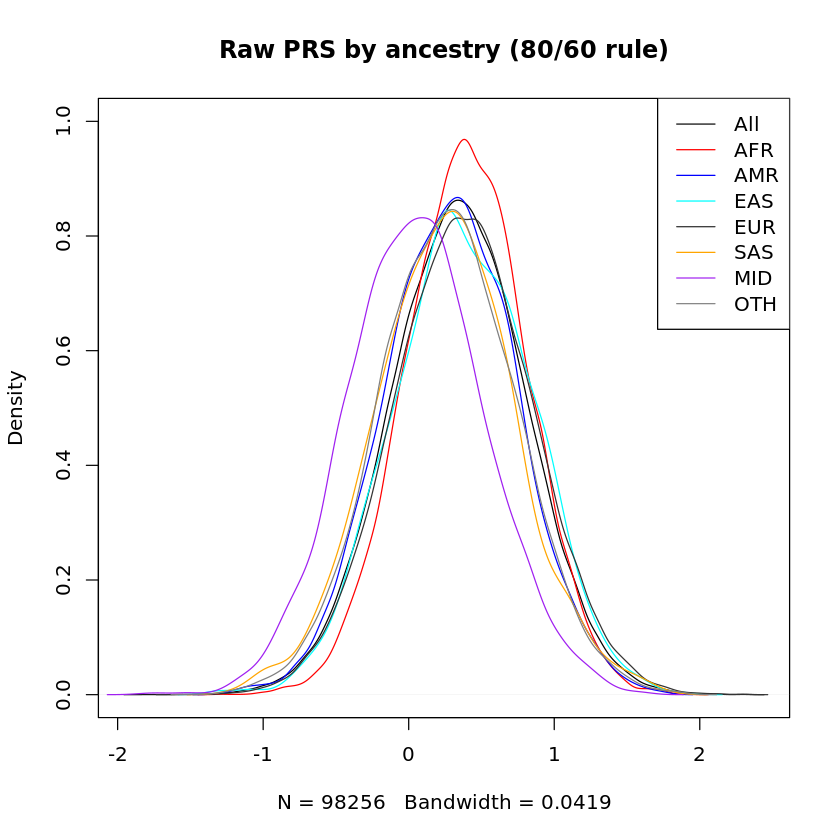

In [109]:
# plot the densities by ancestry
prs.density.all <- density(merge2.dt$PRS)
#describe(merge2.dt$PRS[merge2.dt$my.ancestry3=="NHB" & !is.na(merge2.dt$my.ancestry3)])
prs.density.afr <- density(merge2.dt$PRS[merge2.dt$my.ancestry3=="AFR"])
prs.density.amr <- density(merge2.dt$PRS[merge2.dt$my.ancestry3=="AMR"])
prs.density.eas <- density(merge2.dt$PRS[merge2.dt$my.ancestry3=="EAS"])
prs.density.eur <- density(merge2.dt$PRS[merge2.dt$my.ancestry3=="EUR"])
prs.density.mid <- density(merge2.dt$PRS[merge2.dt$my.ancestry3=="MID"])
prs.density.sas <- density(merge2.dt$PRS[merge2.dt$my.ancestry3=="SAS"])
prs.density.oth <- density(merge2.dt$PRS[merge2.dt$my.ancestry3=="OTH"])

plot(prs.density.all, main="Raw PRS by ancestry (80/60 rule)", ylim=c(0,1))
lines(prs.density.afr, col="red")
lines(prs.density.amr, col="blue")
lines(prs.density.eas, col="cyan")
lines(prs.density.eur, col="gray20")
lines(prs.density.sas, col="orange")
lines(prs.density.mid, col="purple")
lines(prs.density.oth, col="gray50")

legend("topright",legend=c("All","AFR","AMR","EAS","EUR","SAS","MID","OTH"),
       col=c("black","red","blue","cyan","gray20","orange","purple","gray50"),lty=1)


In [110]:
# get means and s.d. into a table
prs.means <- c(mean(merge2.dt$PRS[merge2.dt$my.ancestry3=="AFR"]),
               mean(merge2.dt$PRS[merge2.dt$my.ancestry3=="AMR"]),
               mean(merge2.dt$PRS[merge2.dt$my.ancestry3=="EAS"]),
               mean(merge2.dt$PRS[merge2.dt$my.ancestry3=="EUR"]),
               mean(merge2.dt$PRS[merge2.dt$my.ancestry3=="MID"]),
               mean(merge2.dt$PRS[merge2.dt$my.ancestry3=="SAS"]),
               mean(merge2.dt$PRS[merge2.dt$my.ancestry3=="OTH"]))


prs.sds <- c(sd(merge2.dt$PRS[merge2.dt$my.ancestry3=="AFR"]),
               sd(merge2.dt$PRS[merge2.dt$my.ancestry3=="AMR"]),
               sd(merge2.dt$PRS[merge2.dt$my.ancestry3=="EAS"]),
               sd(merge2.dt$PRS[merge2.dt$my.ancestry3=="EUR"]),
               sd(merge2.dt$PRS[merge2.dt$my.ancestry3=="MID"]),
               sd(merge2.dt$PRS[merge2.dt$my.ancestry3=="SAS"]),
               sd(merge2.dt$PRS[merge2.dt$my.ancestry3=="OTH"]))

sample.size <- c(length(merge2.dt$PRS[merge2.dt$my.ancestry3=="AFR"]),
               length(merge2.dt$PRS[merge2.dt$my.ancestry3=="AMR"]),
               length(merge2.dt$PRS[merge2.dt$my.ancestry3=="EAS"]),
               length(merge2.dt$PRS[merge2.dt$my.ancestry3=="EUR"]),
               length(merge2.dt$PRS[merge2.dt$my.ancestry3=="MID"]),
               length(merge2.dt$PRS[merge2.dt$my.ancestry3=="SAS"]),
               length(merge2.dt$PRS[merge2.dt$my.ancestry3=="OTH"]))

ANC <- c("AFR","AMR","EAS","EUR","MID","SAS","OTH")
dist.dt <- data.table(cbind(ANC,sample.size,round(prs.means,2),round(prs.sds,2)))
setnames(dist.dt,c("ANC","N","mean","SD"))

In [111]:
(raw.dist.dt <- dist.dt)

ANC,N,mean,SD
<chr>,<chr>,<chr>,<chr>
AFR,22385,0.4,0.41
AMR,9382,0.29,0.45
EAS,2069,0.37,0.47
EUR,44099,0.38,0.47
MID,4056,0.05,0.47
SAS,760,0.25,0.47
OTH,15505,0.27,0.47


# Adjust LM with PCs

Since there are 6 continental groups that we are using and I want to use the same number of degrees of freedom, I will use the first 5 PCs


Call:
lm(formula = PRS ~ PC1 + PC2 + PC3 + PC4 + PC5, data = merge2.dt)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.13550 -0.31293  0.00052  0.31114  1.99196 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.282394   0.004135  68.289  < 2e-16 ***
PC1          1.381409   0.232196   5.949 2.70e-09 ***
PC2          1.443171   0.232019   6.220 4.99e-10 ***
PC3          2.355033   0.201672  11.678  < 2e-16 ***
PC4         -7.115399   0.340527 -20.895  < 2e-16 ***
PC5         12.355298   1.379874   8.954  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.462 on 98250 degrees of freedom
Multiple R-squared:  0.008213,	Adjusted R-squared:  0.008163 
F-statistic: 162.7 on 5 and 98250 DF,  p-value: < 2.2e-16


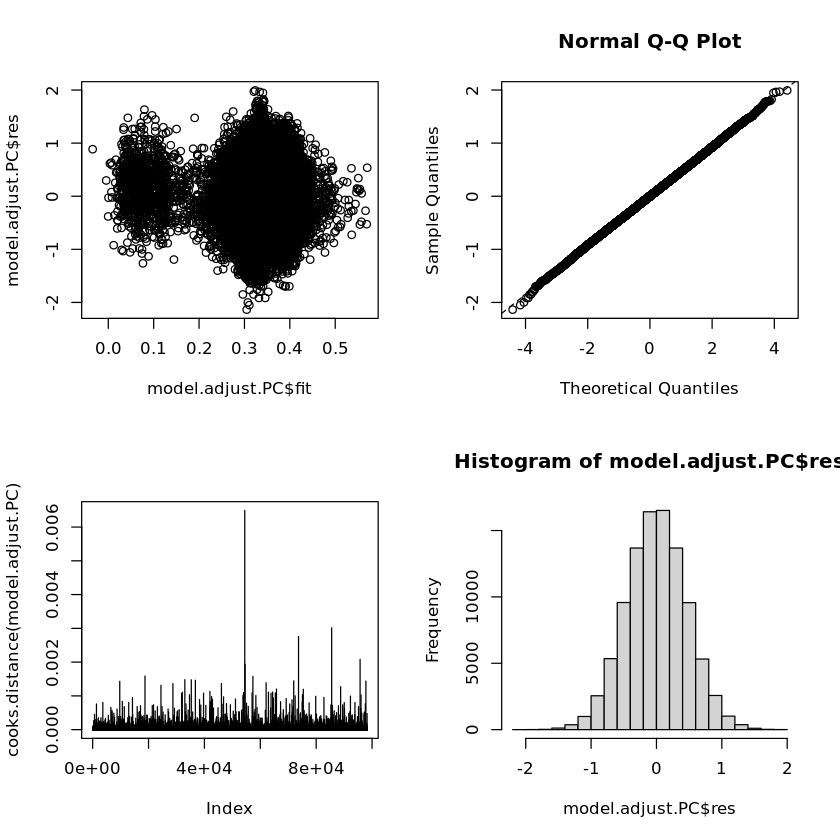

In [112]:
model.adjust.PC <- lm(PRS ~ PC1 + PC2 + PC3 + PC4 + PC5, data=merge2.dt)
prs.adj <- model.adjust.PC$res
summary(model.adjust.PC)
# do I need to check for outliers
par(mfrow=c(2,2))
plot(model.adjust.PC$fit,model.adjust.PC$res)
qqnorm(model.adjust.PC$res)
qqline(model.adjust.PC$res,lty=2)
plot(cooks.distance(model.adjust.PC), type="h")
hist(model.adjust.PC$res)

In [113]:
merge2.dt[,PRS.ADJ.PC:=prs.adj]

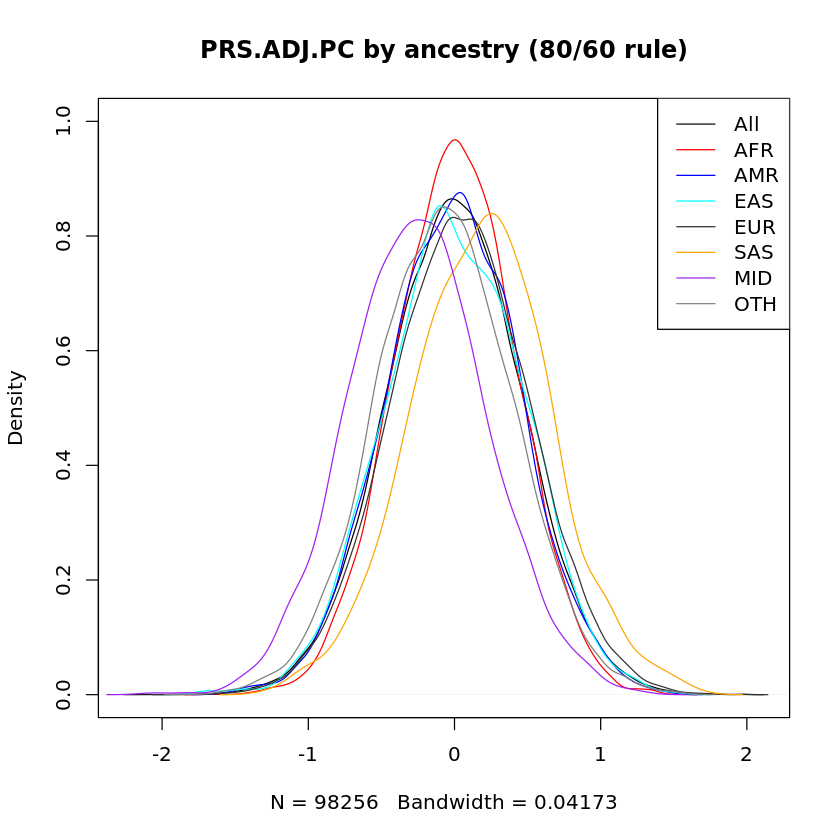

In [114]:
# plot the densities by ancestry
PRS.ADJ.PC.density.all <- density(merge2.dt$PRS.ADJ.PC)
#describe(merge2.dt$PRS.ADJ.PC[merge2.dt$my.ancestry3=="NHB" & !is.na(merge2.dt$my.ancestry3)])
PRS.ADJ.PC.density.afr <- density(merge2.dt$PRS.ADJ.PC[merge2.dt$my.ancestry3=="AFR"])
PRS.ADJ.PC.density.amr <- density(merge2.dt$PRS.ADJ.PC[merge2.dt$my.ancestry3=="AMR"])
PRS.ADJ.PC.density.eas <- density(merge2.dt$PRS.ADJ.PC[merge2.dt$my.ancestry3=="EAS"])
PRS.ADJ.PC.density.eur <- density(merge2.dt$PRS.ADJ.PC[merge2.dt$my.ancestry3=="EUR"])
PRS.ADJ.PC.density.mid <- density(merge2.dt$PRS.ADJ.PC[merge2.dt$my.ancestry3=="MID"])
PRS.ADJ.PC.density.sas <- density(merge2.dt$PRS.ADJ.PC[merge2.dt$my.ancestry3=="SAS"])
PRS.ADJ.PC.density.oth <- density(merge2.dt$PRS.ADJ.PC[merge2.dt$my.ancestry3=="OTH"])

plot(PRS.ADJ.PC.density.all, main="PRS.ADJ.PC by ancestry (80/60 rule)", ylim=c(0,1))
lines(PRS.ADJ.PC.density.afr, col="red")
lines(PRS.ADJ.PC.density.amr, col="blue")
lines(PRS.ADJ.PC.density.eas, col="cyan")
lines(PRS.ADJ.PC.density.eur, col="gray20")
lines(PRS.ADJ.PC.density.sas, col="orange")
lines(PRS.ADJ.PC.density.mid, col="purple")
lines(PRS.ADJ.PC.density.oth, col="gray50")

legend("topright",legend=c("All","AFR","AMR","EAS","EUR","SAS","MID","OTH"),
       col=c("black","red","blue","cyan","gray20","orange","purple","gray50"),lty=1)

In [115]:
# get means and s.d. into a table
PRS.ADJ.PC.means <- c(mean(merge2.dt$PRS.ADJ.PC[merge2.dt$my.ancestry3=="AFR"]),
               mean(merge2.dt$PRS.ADJ.PC[merge2.dt$my.ancestry3=="AMR"]),
               mean(merge2.dt$PRS.ADJ.PC[merge2.dt$my.ancestry3=="EAS"]),
               mean(merge2.dt$PRS.ADJ.PC[merge2.dt$my.ancestry3=="EUR"]),
               mean(merge2.dt$PRS.ADJ.PC[merge2.dt$my.ancestry3=="MID"]),
               mean(merge2.dt$PRS.ADJ.PC[merge2.dt$my.ancestry3=="SAS"]),
               mean(merge2.dt$PRS.ADJ.PC[merge2.dt$my.ancestry3=="OTH"]))


PRS.ADJ.PC.sds <- c(sd(merge2.dt$PRS.ADJ.PC[merge2.dt$my.ancestry3=="AFR"]),
               sd(merge2.dt$PRS.ADJ.PC[merge2.dt$my.ancestry3=="AMR"]),
               sd(merge2.dt$PRS.ADJ.PC[merge2.dt$my.ancestry3=="EAS"]),
               sd(merge2.dt$PRS.ADJ.PC[merge2.dt$my.ancestry3=="EUR"]),
               sd(merge2.dt$PRS.ADJ.PC[merge2.dt$my.ancestry3=="MID"]),
               sd(merge2.dt$PRS.ADJ.PC[merge2.dt$my.ancestry3=="SAS"]),
               sd(merge2.dt$PRS.ADJ.PC[merge2.dt$my.ancestry3=="OTH"]))

sample.size <- c(length(merge2.dt$PRS.ADJ.PC[merge2.dt$my.ancestry3=="AFR"]),
               length(merge2.dt$PRS.ADJ.PC[merge2.dt$my.ancestry3=="AMR"]),
               length(merge2.dt$PRS.ADJ.PC[merge2.dt$my.ancestry3=="EAS"]),
               length(merge2.dt$PRS.ADJ.PC[merge2.dt$my.ancestry3=="EUR"]),
               length(merge2.dt$PRS.ADJ.PC[merge2.dt$my.ancestry3=="MID"]),
               length(merge2.dt$PRS.ADJ.PC[merge2.dt$my.ancestry3=="SAS"]),
               length(merge2.dt$PRS.ADJ.PC[merge2.dt$my.ancestry3=="OTH"]))

ANC <- c("AFR","AMR","EAS","EUR","MID","SAS","OTH")
dist.dt <- data.table(cbind(ANC,sample.size,round(PRS.ADJ.PC.means,2),round(PRS.ADJ.PC.sds,2)))
setnames(dist.dt,c("ANC","N","mean","SD"))

In [116]:
(PC.dist.dt <- dist.dt)

ANC,N,mean,SD
<chr>,<chr>,<chr>,<chr>
AFR,22385,0.01,0.41
AMR,9382,-0.01,0.45
EAS,2069,0,0.47
EUR,44099,0.04,0.47
MID,4056,-0.25,0.47
SAS,760,0.18,0.47
OTH,15505,-0.07,0.47


In [26]:
# Try all 32 PCs to compare with results from adjusting for ANC as the admixture estimates are based on 32 eigenvectors
(pc.cols <- names(merge2.dt)[names(merge2.dt) %like% "PC"])

[1] "PC1"  "PC2"  "PC3"  "PC4"  "PC5"  "PC6"  "PC7"  "PC8"  "PC9"  "PC10"
[11] "PC11" "PC12" "PC13" "PC14" "PC15" "PC16" "PC17" "PC18" "PC19" "PC20"
[21] "PC21" "PC22" "PC23" "PC24" "PC25" "PC26" "PC27" "PC28" "PC29" "PC30"
[31] "PC31" "PC32"

In [33]:
paste0(pc.cols,collapse="+")

[1] "PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10+PC11+PC12+PC13+PC14+PC15+PC16+PC17+PC18+PC19+PC20+PC21+PC22+PC23+PC24+PC25+PC26+PC27+PC28+PC29+PC30+PC31+PC32"

In [34]:
model.adjust.PC <- lm(PRS ~ PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10+PC11+PC12+PC13+PC14+PC15+PC16+PC17+PC18+PC19+
                      PC20+PC21+PC22+PC23+PC24+PC25+PC26+PC27+PC28+PC29+PC30+PC31+PC32, data=merge2.dt)
prs.adj <- model.adjust.PC$res
summary(model.adjust.PC)


Call:
lm(formula = PRS ~ PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + 
    PC8 + PC9 + PC10 + PC11 + PC12 + PC13 + PC14 + PC15 + PC16 + 
    PC17 + PC18 + PC19 + PC20 + PC21 + PC22 + PC23 + PC24 + PC25 + 
    PC26 + PC27 + PC28 + PC29 + PC30 + PC31 + PC32, data = merge2.dt)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.94152 -0.30810 -0.00045  0.30570  1.93423 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.30267    0.00505  59.939  < 2e-16 ***
PC1          2.24304    0.33007   6.796 1.08e-11 ***
PC2          3.99436    0.27229  14.670  < 2e-16 ***
PC3          0.62133    0.24644   2.521 0.011697 *  
PC4         -1.80962    0.39667  -4.562 5.07e-06 ***
PC5          2.85008    1.66181   1.715 0.086340 .  
PC6          2.70234    1.42799   1.892 0.058439 .  
PC7         -7.29749    0.30199 -24.165  < 2e-16 ***
PC8          0.85653    0.86480   0.990 0.321962    
PC9          3.97595    0.47770   8.323  < 2e-16 ***
PC10        -2.66500    0

In [35]:
merge2.dt[,PRS.ADJ.PC32:=prs.adj]

In [36]:
# get means and s.d. into a table
PRS.ADJ.PC32.means <- c(mean(merge2.dt$PRS.ADJ.PC32[merge2.dt$my.ancestry3=="AFR"]),
               mean(merge2.dt$PRS.ADJ.PC32[merge2.dt$my.ancestry3=="AMR"]),
               mean(merge2.dt$PRS.ADJ.PC32[merge2.dt$my.ancestry3=="EAS"]),
               mean(merge2.dt$PRS.ADJ.PC32[merge2.dt$my.ancestry3=="EUR"]),
               mean(merge2.dt$PRS.ADJ.PC32[merge2.dt$my.ancestry3=="MID"]),
               mean(merge2.dt$PRS.ADJ.PC32[merge2.dt$my.ancestry3=="SAS"]),
               mean(merge2.dt$PRS.ADJ.PC32[merge2.dt$my.ancestry3=="OTH"]))


PRS.ADJ.PC32.sds <- c(sd(merge2.dt$PRS.ADJ.PC32[merge2.dt$my.ancestry3=="AFR"]),
               sd(merge2.dt$PRS.ADJ.PC32[merge2.dt$my.ancestry3=="AMR"]),
               sd(merge2.dt$PRS.ADJ.PC32[merge2.dt$my.ancestry3=="EAS"]),
               sd(merge2.dt$PRS.ADJ.PC32[merge2.dt$my.ancestry3=="EUR"]),
               sd(merge2.dt$PRS.ADJ.PC32[merge2.dt$my.ancestry3=="MID"]),
               sd(merge2.dt$PRS.ADJ.PC32[merge2.dt$my.ancestry3=="SAS"]),
               sd(merge2.dt$PRS.ADJ.PC32[merge2.dt$my.ancestry3=="OTH"]))

sample.size <- c(length(merge2.dt$PRS.ADJ.PC32[merge2.dt$my.ancestry3=="AFR"]),
               length(merge2.dt$PRS.ADJ.PC32[merge2.dt$my.ancestry3=="AMR"]),
               length(merge2.dt$PRS.ADJ.PC32[merge2.dt$my.ancestry3=="EAS"]),
               length(merge2.dt$PRS.ADJ.PC32[merge2.dt$my.ancestry3=="EUR"]),
               length(merge2.dt$PRS.ADJ.PC32[merge2.dt$my.ancestry3=="MID"]),
               length(merge2.dt$PRS.ADJ.PC32[merge2.dt$my.ancestry3=="SAS"]),
               length(merge2.dt$PRS.ADJ.PC32[merge2.dt$my.ancestry3=="OTH"]))

ANC <- c("AFR","AMR","EAS","EUR","MID","SAS","OTH")
dist.dt <- data.table(cbind(ANC,sample.size,round(PRS.ADJ.PC32.means,2),round(PRS.ADJ.PC32.sds,2)))
setnames(dist.dt,c("ANC","N","mean","SD"))

In [37]:
(PC32.dist.dt <- dist.dt)

ANC,N,mean,SD
<chr>,<chr>,<chr>,<chr>
AFR,22385,0,0.41
AMR,9382,0,0.45
EAS,2069,0,0.45
EUR,44099,0,0.47
MID,4056,0.01,0.47
SAS,760,0,0.47
OTH,15505,0,0.46


# Adjust LM with ANC


Call:
lm(formula = PRS ~ AFR + AMR + EAS + MID + SAS, data = merge2.dt)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.96031 -0.30915 -0.00057  0.30619  1.94139 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.379360   0.002210 171.641  < 2e-16 ***
AFR          0.025557   0.004346   5.880  4.1e-09 ***
AMR         -0.087030   0.005602 -15.535  < 2e-16 ***
EAS          0.012882   0.010563   1.219    0.223    
MID         -0.469463   0.008849 -53.054  < 2e-16 ***
SAS         -0.143322   0.016151  -8.874  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4562 on 98250 degrees of freedom
Multiple R-squared:  0.03316,	Adjusted R-squared:  0.03311 
F-statistic: 673.9 on 5 and 98250 DF,  p-value: < 2.2e-16


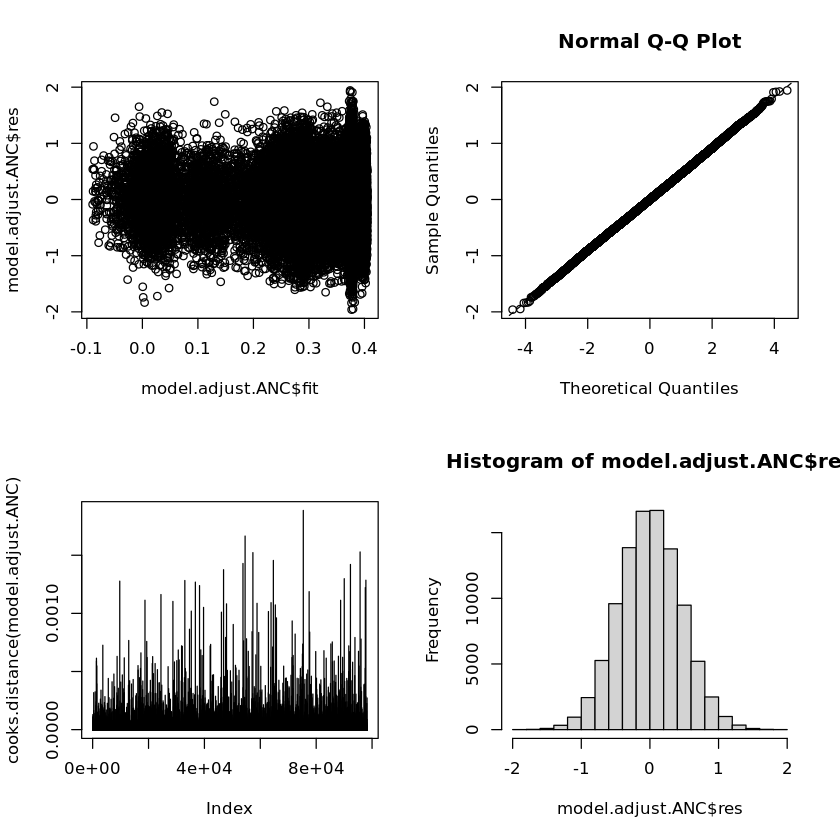

In [117]:
model.adjust.ANC <- lm(PRS ~ AFR + AMR + EAS + MID + SAS, data=merge2.dt) #leave out EUR since highest proportion
prs.adj <- model.adjust.ANC$res
summary(model.adjust.ANC)
# do I need to check for outliers
par(mfrow=c(2,2))
plot(model.adjust.ANC$fit,model.adjust.ANC$res)
qqnorm(model.adjust.ANC$res)
qqline(model.adjust.ANC$res,lty=2)
plot(cooks.distance(model.adjust.ANC), type="h")
hist(model.adjust.ANC$res)




In [118]:
merge2.dt[,PRS.ADJ.ANC:=prs.adj]

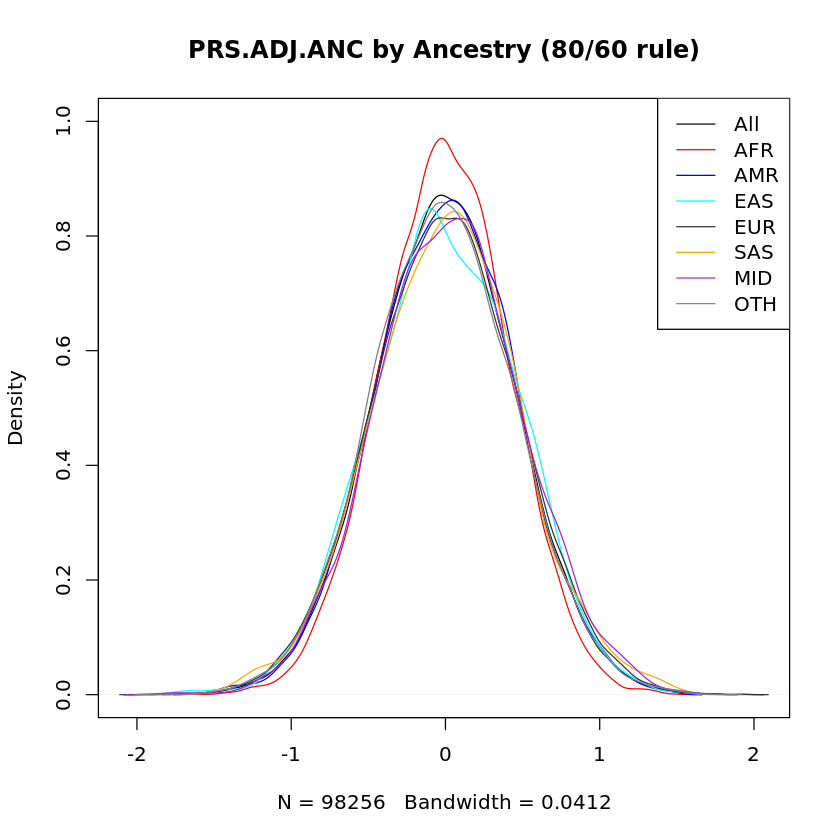

In [119]:
# plot the densities by ancestry
PRS.ADJ.ANC.density.all <- density(merge2.dt$PRS.ADJ.ANC)
#describe(merge2.dt$PRS.ADJ.ANC[merge2.dt$my.ancestry3=="NHB" & !is.na(merge2.dt$my.ancestry3)])
PRS.ADJ.ANC.density.afr <- density(merge2.dt$PRS.ADJ.ANC[merge2.dt$my.ancestry3=="AFR"])
PRS.ADJ.ANC.density.amr <- density(merge2.dt$PRS.ADJ.ANC[merge2.dt$my.ancestry3=="AMR"])
PRS.ADJ.ANC.density.eas <- density(merge2.dt$PRS.ADJ.ANC[merge2.dt$my.ancestry3=="EAS"])
PRS.ADJ.ANC.density.eur <- density(merge2.dt$PRS.ADJ.ANC[merge2.dt$my.ancestry3=="EUR"])
PRS.ADJ.ANC.density.mid <- density(merge2.dt$PRS.ADJ.ANC[merge2.dt$my.ancestry3=="MID"])
PRS.ADJ.ANC.density.sas <- density(merge2.dt$PRS.ADJ.ANC[merge2.dt$my.ancestry3=="SAS"])
PRS.ADJ.ANC.density.oth <- density(merge2.dt$PRS.ADJ.ANC[merge2.dt$my.ancestry3=="OTH"])

plot(PRS.ADJ.ANC.density.all, main="PRS.ADJ.ANC by Ancestry (80/60 rule)", ylim=c(0,1))
lines(PRS.ADJ.ANC.density.afr, col="red")
lines(PRS.ADJ.ANC.density.amr, col="blue")
lines(PRS.ADJ.ANC.density.eas, col="cyan")
lines(PRS.ADJ.ANC.density.eur, col="gray20")
lines(PRS.ADJ.ANC.density.sas, col="orange")
lines(PRS.ADJ.ANC.density.mid, col="purple")
lines(PRS.ADJ.ANC.density.oth, col="gray50")

legend("topright",legend=c("All","AFR","AMR","EAS","EUR","SAS","MID","OTH"),
       col=c("black","red","blue","cyan","gray20","orange","purple","gray50"),lty=1)

In [120]:
# get means and s.d. into a table
PRS.ADJ.ANC.means <- c(mean(merge2.dt$PRS.ADJ.ANC[merge2.dt$my.ancestry3=="AFR"]),
               mean(merge2.dt$PRS.ADJ.ANC[merge2.dt$my.ancestry3=="AMR"]),
               mean(merge2.dt$PRS.ADJ.ANC[merge2.dt$my.ancestry3=="EAS"]),
               mean(merge2.dt$PRS.ADJ.ANC[merge2.dt$my.ancestry3=="EUR"]),
               mean(merge2.dt$PRS.ADJ.ANC[merge2.dt$my.ancestry3=="MID"]),
               mean(merge2.dt$PRS.ADJ.ANC[merge2.dt$my.ancestry3=="SAS"]),
               mean(merge2.dt$PRS.ADJ.ANC[merge2.dt$my.ancestry3=="OTH"]))


PRS.ADJ.ANC.sds <- c(sd(merge2.dt$PRS.ADJ.ANC[merge2.dt$my.ancestry3=="AFR"]),
               sd(merge2.dt$PRS.ADJ.ANC[merge2.dt$my.ancestry3=="AMR"]),
               sd(merge2.dt$PRS.ADJ.ANC[merge2.dt$my.ancestry3=="EAS"]),
               sd(merge2.dt$PRS.ADJ.ANC[merge2.dt$my.ancestry3=="EUR"]),
               sd(merge2.dt$PRS.ADJ.ANC[merge2.dt$my.ancestry3=="MID"]),
               sd(merge2.dt$PRS.ADJ.ANC[merge2.dt$my.ancestry3=="SAS"]),
               sd(merge2.dt$PRS.ADJ.ANC[merge2.dt$my.ancestry3=="OTH"]))

sample.size <- c(length(merge2.dt$PRS.ADJ.ANC[merge2.dt$my.ancestry3=="AFR"]),
               length(merge2.dt$PRS.ADJ.ANC[merge2.dt$my.ancestry3=="AMR"]),
               length(merge2.dt$PRS.ADJ.ANC[merge2.dt$my.ancestry3=="EAS"]),
               length(merge2.dt$PRS.ADJ.ANC[merge2.dt$my.ancestry3=="EUR"]),
               length(merge2.dt$PRS.ADJ.ANC[merge2.dt$my.ancestry3=="MID"]),
               length(merge2.dt$PRS.ADJ.ANC[merge2.dt$my.ancestry3=="SAS"]),
               length(merge2.dt$PRS.ADJ.ANC[merge2.dt$my.ancestry3=="OTH"]))

ANC <- c("AFR","AMR","EAS","EUR","MID","SAS","OTH")
dist.dt <- data.table(cbind(ANC,sample.size,round(PRS.ADJ.ANC.means,2),round(PRS.ADJ.ANC.sds,2)))
setnames(dist.dt,c("ANC","N","mean","SD"))

In [121]:
(ANC.dist.dt <- dist.dt)

ANC,N,mean,SD
<chr>,<chr>,<chr>,<chr>
AFR,22385,0,0.41
AMR,9382,0,0.45
EAS,2069,0,0.47
EUR,44099,0,0.47
MID,4056,0.03,0.47
SAS,760,0.01,0.47
OTH,15505,-0.01,0.46


# BROAD adjustment using the 1KG and HGDP reference data

In [122]:
fit.broad.ref <- broad.adjust(data.pred=ref.merge.dt,data.apply=merge2.dt)

In [123]:
merge2.dt[,PRS.BR.REF:=fit.broad.ref[[1]]]

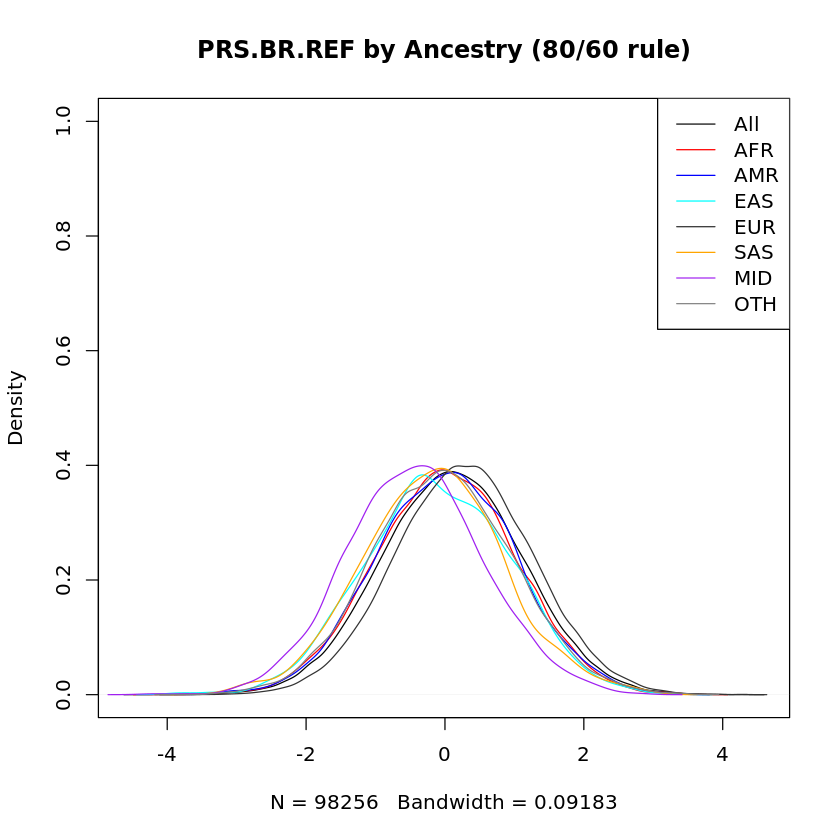

In [124]:
# plot the densities by ancestry
PRS.BR.REF.density.all <- density(merge2.dt$PRS.BR.REF)
#describe(merge2.dt$PRS.BR.REF[merge2.dt$my.ancestry3=="NHB" & !is.na(merge2.dt$my.ancestry3)])
PRS.BR.REF.density.afr <- density(merge2.dt$PRS.BR.REF[merge2.dt$my.ancestry3=="AFR"])
PRS.BR.REF.density.amr <- density(merge2.dt$PRS.BR.REF[merge2.dt$my.ancestry3=="AMR"])
PRS.BR.REF.density.eas <- density(merge2.dt$PRS.BR.REF[merge2.dt$my.ancestry3=="EAS"])
PRS.BR.REF.density.eur <- density(merge2.dt$PRS.BR.REF[merge2.dt$my.ancestry3=="EUR"])
PRS.BR.REF.density.mid <- density(merge2.dt$PRS.BR.REF[merge2.dt$my.ancestry3=="MID"])
PRS.BR.REF.density.sas <- density(merge2.dt$PRS.BR.REF[merge2.dt$my.ancestry3=="SAS"])
PRS.BR.REF.density.oth <- density(merge2.dt$PRS.BR.REF[merge2.dt$my.ancestry3=="OTH"])

plot(PRS.BR.REF.density.all, main="PRS.BR.REF by Ancestry (80/60 rule)", ylim=c(0,1))
lines(PRS.BR.REF.density.afr, col="red")
lines(PRS.BR.REF.density.amr, col="blue")
lines(PRS.BR.REF.density.eas, col="cyan")
lines(PRS.BR.REF.density.eur, col="gray20")
lines(PRS.BR.REF.density.sas, col="orange")
lines(PRS.BR.REF.density.mid, col="purple")
lines(PRS.BR.REF.density.oth, col="gray50")

legend("topright",legend=c("All","AFR","AMR","EAS","EUR","SAS","MID","OTH"),
       col=c("black","red","blue","cyan","gray20","orange","purple","gray50"),lty=1)

In [125]:
# get means and s.d. into a table
PRS.BR.REF.means <- c(mean(merge2.dt$PRS.BR.REF[merge2.dt$my.ancestry3=="AFR"]),
               mean(merge2.dt$PRS.BR.REF[merge2.dt$my.ancestry3=="AMR"]),
               mean(merge2.dt$PRS.BR.REF[merge2.dt$my.ancestry3=="EAS"]),
               mean(merge2.dt$PRS.BR.REF[merge2.dt$my.ancestry3=="EUR"]),
               mean(merge2.dt$PRS.BR.REF[merge2.dt$my.ancestry3=="MID"]),
               mean(merge2.dt$PRS.BR.REF[merge2.dt$my.ancestry3=="SAS"]),
               mean(merge2.dt$PRS.BR.REF[merge2.dt$my.ancestry3=="OTH"]))


PRS.BR.REF.sds <- c(sd(merge2.dt$PRS.BR.REF[merge2.dt$my.ancestry3=="AFR"]),
               sd(merge2.dt$PRS.BR.REF[merge2.dt$my.ancestry3=="AMR"]),
               sd(merge2.dt$PRS.BR.REF[merge2.dt$my.ancestry3=="EAS"]),
               sd(merge2.dt$PRS.BR.REF[merge2.dt$my.ancestry3=="EUR"]),
               sd(merge2.dt$PRS.BR.REF[merge2.dt$my.ancestry3=="MID"]),
               sd(merge2.dt$PRS.BR.REF[merge2.dt$my.ancestry3=="SAS"]),
               sd(merge2.dt$PRS.BR.REF[merge2.dt$my.ancestry3=="OTH"]))

sample.size <- c(length(merge2.dt$PRS.BR.REF[merge2.dt$my.ancestry3=="AFR"]),
               length(merge2.dt$PRS.BR.REF[merge2.dt$my.ancestry3=="AMR"]),
               length(merge2.dt$PRS.BR.REF[merge2.dt$my.ancestry3=="EAS"]),
               length(merge2.dt$PRS.BR.REF[merge2.dt$my.ancestry3=="EUR"]),
               length(merge2.dt$PRS.BR.REF[merge2.dt$my.ancestry3=="MID"]),
               length(merge2.dt$PRS.BR.REF[merge2.dt$my.ancestry3=="SAS"]),
               length(merge2.dt$PRS.BR.REF[merge2.dt$my.ancestry3=="OTH"]))

ANC <- c("AFR","AMR","EAS","EUR","MID","SAS","OTH")
dist.dt <- data.table(cbind(ANC,sample.size,round(PRS.BR.REF.means,2),round(PRS.BR.REF.sds,2)))
setnames(dist.dt,c("ANC","N","mean","SD"))

In [126]:
(BR.REF.dist.dt <- dist.dt)

ANC,N,mean,SD
<chr>,<chr>,<chr>,<chr>
AFR,22385,0.01,1.01
AMR,9382,0.01,1.01
EAS,2069,-0.1,1.03
EUR,44099,0.28,0.99
MID,4056,-0.43,0.99
SAS,760,-0.17,1.01
OTH,15505,-0.03,1.01


# BROAD adjustment using the AoU unscreened controls

In [127]:
#get the subset of data that are unscreened controls
unscreened.dt <- merge2.dt[][merge2.dt$CRC.status==0 & merge2.dt$SCREENED==0]
as.data.frame(unscreened.dt) %>%
    count(CRC.status,CSET1, CSET3, SCREENED)

CRC.status,CSET1,CSET3,SCREENED,n
<int>,<int>,<int>,<int>,<int>
0,0,0,0,85210


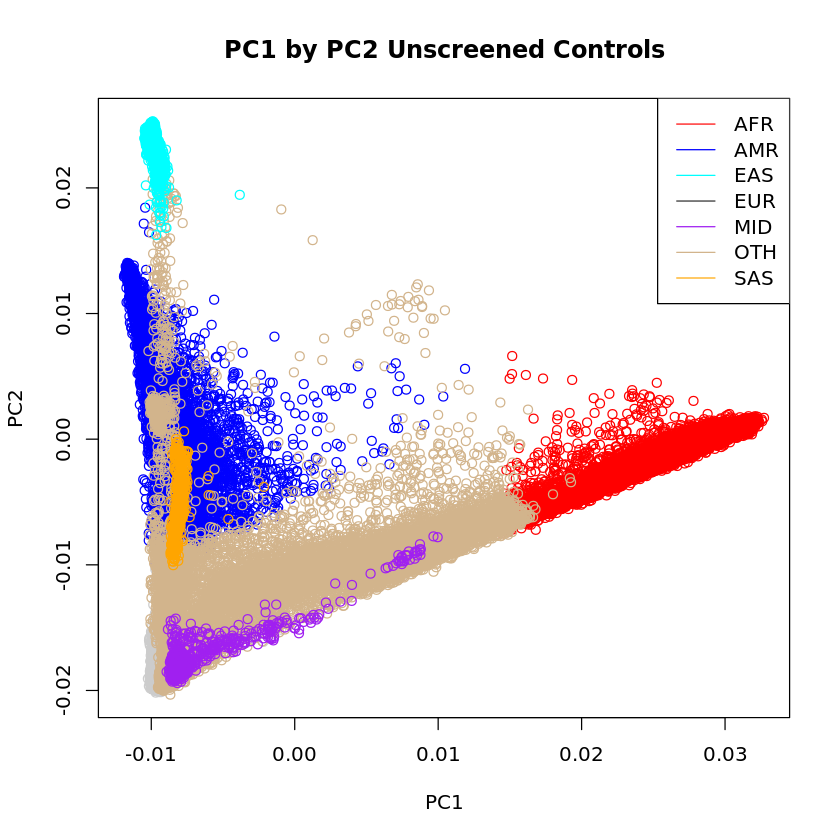

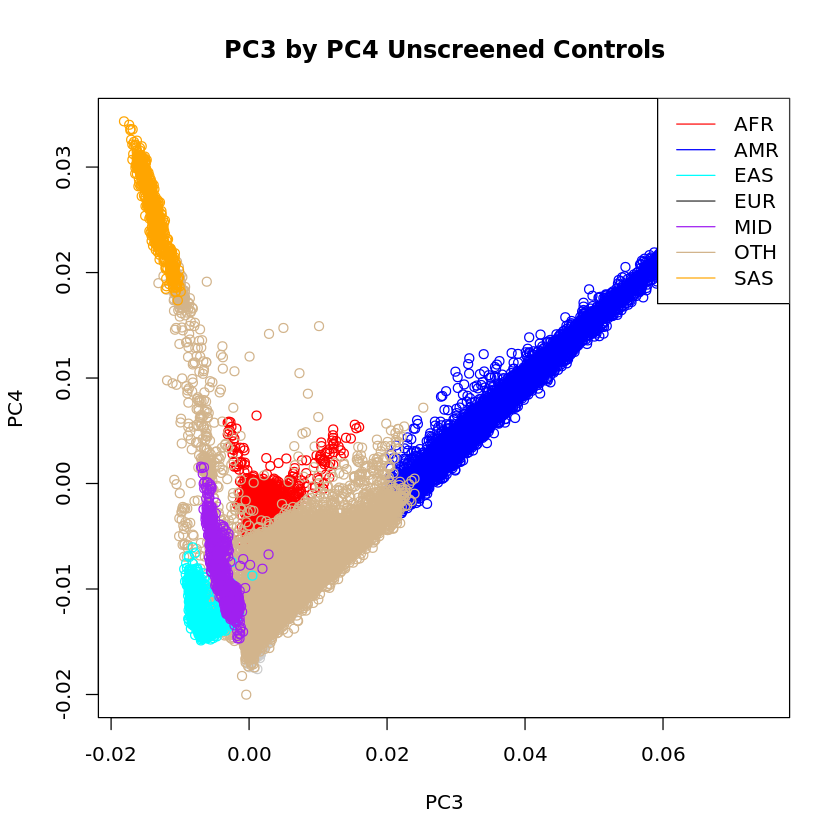

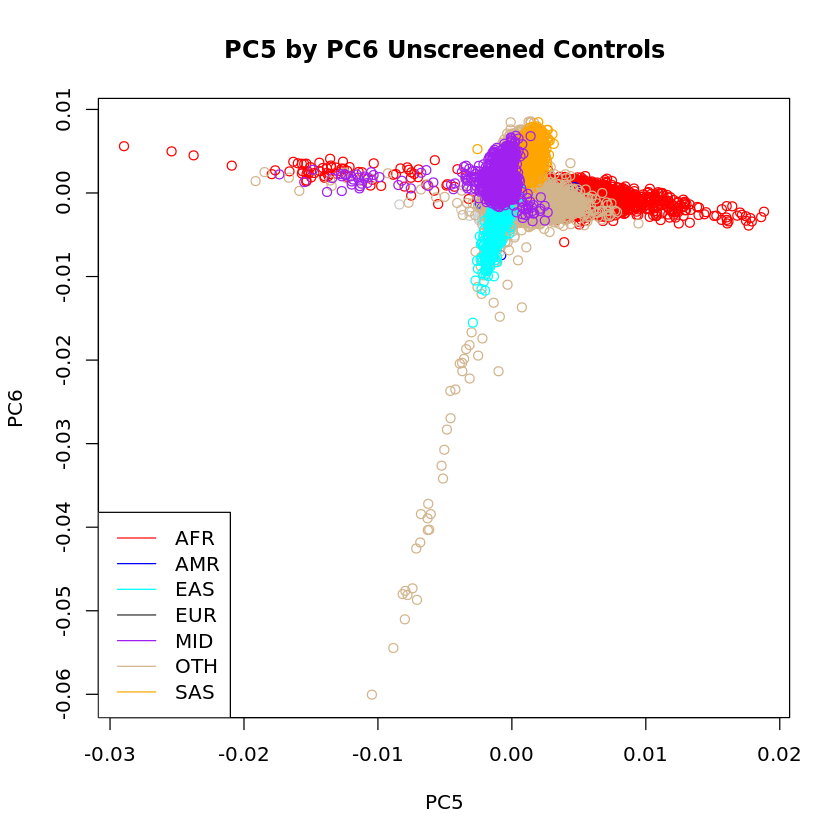

In [128]:
# verify that these participants span the PC space
plot(unscreened.dt$PC1,unscreened.dt$PC2,type="n",main="PC1 by PC2 Unscreened Controls", xlab="PC1", ylab="PC2")
points(unscreened.dt$PC1[unscreened.dt$my.ancestry3=="EUR"],unscreened.dt$PC2[unscreened.dt$my.ancestry3=="EUR"],pty=2,col="gray80")
points(unscreened.dt$PC1[unscreened.dt$my.ancestry3=="AFR"],unscreened.dt$PC2[unscreened.dt$my.ancestry3=="AFR"],pty=2,col="red")
points(unscreened.dt$PC1[unscreened.dt$my.ancestry3=="AMR"],unscreened.dt$PC2[unscreened.dt$my.ancestry3=="AMR"],pty=2,col="blue")
points(unscreened.dt$PC1[unscreened.dt$my.ancestry3=="OTH"],unscreened.dt$PC2[unscreened.dt$my.ancestry3=="OTH"],pty=2,col="tan")
points(unscreened.dt$PC1[unscreened.dt$my.ancestry3=="EAS"],unscreened.dt$PC2[unscreened.dt$my.ancestry3=="EAS"],pty=2,col="cyan")
points(unscreened.dt$PC1[unscreened.dt$my.ancestry3=="SAS"],unscreened.dt$PC2[unscreened.dt$my.ancestry3=="SAS"],pty=2,col="orange")
points(unscreened.dt$PC1[unscreened.dt$my.ancestry3=="MID"],unscreened.dt$PC2[unscreened.dt$my.ancestry3=="MID"],pty=2,col="purple")
legend("topright",legend=c("AFR","AMR","EAS","EUR","MID","OTH","SAS"),
       col=c("red","blue","cyan","gray20","purple","tan","orange"),lty=1)

plot(unscreened.dt$PC3,unscreened.dt$PC4,type="n",main="PC3 by PC4 Unscreened Controls", xlab="PC3", ylab="PC4")
points(unscreened.dt$PC3[unscreened.dt$my.ancestry3=="EUR"],unscreened.dt$PC4[unscreened.dt$my.ancestry3=="EUR"],pty=2,col="gray80")
points(unscreened.dt$PC3[unscreened.dt$my.ancestry3=="AFR"],unscreened.dt$PC4[unscreened.dt$my.ancestry3=="AFR"],pty=2,col="red")
points(unscreened.dt$PC3[unscreened.dt$my.ancestry3=="AMR"],unscreened.dt$PC4[unscreened.dt$my.ancestry3=="AMR"],pty=2,col="blue")
points(unscreened.dt$PC3[unscreened.dt$my.ancestry3=="OTH"],unscreened.dt$PC4[unscreened.dt$my.ancestry3=="OTH"],pty=2,col="tan")
points(unscreened.dt$PC3[unscreened.dt$my.ancestry3=="EAS"],unscreened.dt$PC4[unscreened.dt$my.ancestry3=="EAS"],pty=2,col="cyan")
points(unscreened.dt$PC3[unscreened.dt$my.ancestry3=="SAS"],unscreened.dt$PC4[unscreened.dt$my.ancestry3=="SAS"],pty=2,col="orange")
points(unscreened.dt$PC3[unscreened.dt$my.ancestry3=="MID"],unscreened.dt$PC4[unscreened.dt$my.ancestry3=="MID"],pty=2,col="purple")
legend("topright",legend=c("AFR","AMR","EAS","EUR","MID","OTH","SAS"),
       col=c("red","blue","cyan","gray20","purple","tan","orange"),lty=1)

plot(unscreened.dt$PC5,unscreened.dt$PC6,type="n",main="PC5 by PC6 Unscreened Controls", xlab="PC5", ylab="PC6")
points(unscreened.dt$PC5[unscreened.dt$my.ancestry3=="EUR"],unscreened.dt$PC6[unscreened.dt$my.ancestry3=="EUR"],pty=2,col="gray80")
points(unscreened.dt$PC5[unscreened.dt$my.ancestry3=="AFR"],unscreened.dt$PC6[unscreened.dt$my.ancestry3=="AFR"],pty=2,col="red")
points(unscreened.dt$PC5[unscreened.dt$my.ancestry3=="AMR"],unscreened.dt$PC6[unscreened.dt$my.ancestry3=="AMR"],pty=2,col="blue")
points(unscreened.dt$PC5[unscreened.dt$my.ancestry3=="OTH"],unscreened.dt$PC6[unscreened.dt$my.ancestry3=="OTH"],pty=2,col="tan")
points(unscreened.dt$PC5[unscreened.dt$my.ancestry3=="EAS"],unscreened.dt$PC6[unscreened.dt$my.ancestry3=="EAS"],pty=2,col="cyan")
points(unscreened.dt$PC5[unscreened.dt$my.ancestry3=="SAS"],unscreened.dt$PC6[unscreened.dt$my.ancestry3=="SAS"],pty=2,col="orange")
points(unscreened.dt$PC5[unscreened.dt$my.ancestry3=="MID"],unscreened.dt$PC6[unscreened.dt$my.ancestry3=="MID"],pty=2,col="purple")
legend("bottomleft",legend=c("AFR","AMR","EAS","EUR","MID","OTH","SAS"),
       col=c("red","blue","cyan","gray20","purple","tan","orange"),lty=1)

In [129]:
# try to use Euclidean distance from the geometric mean to determine sampling 
(geom.med <- geometric_median(unscreened.dt[,list(PC1,PC2,PC3,PC4,PC5)]))

PC1           PC2           PC3           PC4           PC5 
-0.0082919033 -0.0179100237  0.0013436894 -0.0130157902 -0.0005308273

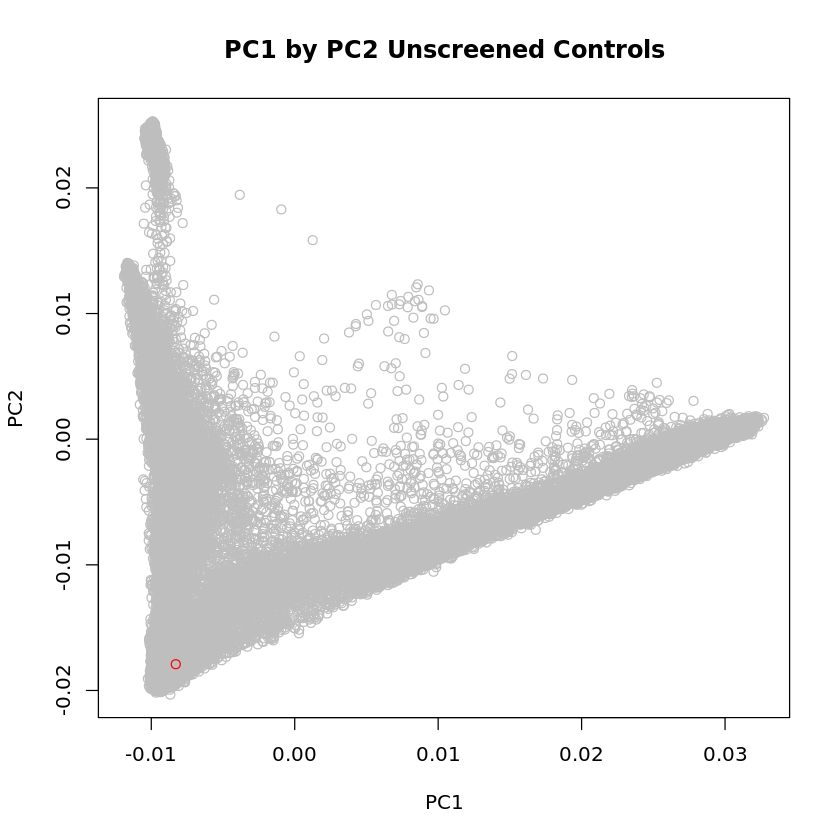

In [130]:
plot(unscreened.dt$PC1,unscreened.dt$PC2,col="gray",main="PC1 by PC2 Unscreened Controls", xlab="PC1", ylab="PC2")
points(geom.med[["PC1"]],geom.med[["PC2"]],col="red")

In [131]:
euc.dist <-  apply(unscreened.dt[,list(PC1,PC2,PC3,PC4,PC5)],MARGIN=1,function(x) sqrt(sum((x - geom.med)^2)))
str(euc.dist)
describe(euc.dist)
unscreened.dt[,euc.dist:=euc.dist]                   
describe(unscreened.dt$euc.dist)

 num [1:85210] 0.00271 0.00203 0.00201 0.01777 0.05886 ...


euc.dist 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   85210        0    85210        1  0.01851  0.01977 0.001696 0.001875 
     .25      .50      .75      .90      .95 
0.002258 0.004791 0.037899 0.042372 0.044589 

lowest : 0.0003789573 0.0003926976 0.0004013649 0.0004186216 0.0004380117
highest: 0.0896078525 0.0896481735 0.0898286287 0.0899019666 0.0899148565

unscreened.dt$euc.dist 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   85210        0    85210        1  0.01851  0.01977 0.001696 0.001875 
     .25      .50      .75      .90      .95 
0.002258 0.004791 0.037899 0.042372 0.044589 

lowest : 0.0003789573 0.0003926976 0.0004013649 0.0004186216 0.0004380117
highest: 0.0896078525 0.0896481735 0.0898286287 0.0899019666 0.0899148565

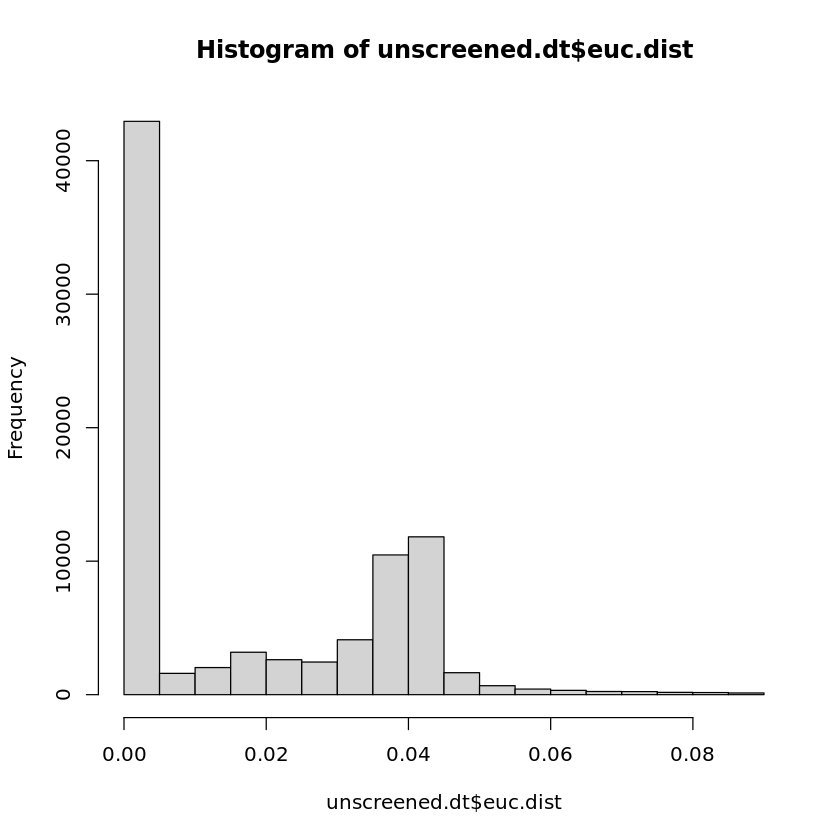

In [132]:
hist(unscreened.dt$euc.dist)

In [133]:
# get cutoffs for the distances from which to randomly select an equal number of participants
(cutoffs <- 0.2*seq(1:5)*max(euc.dist))
dist.cat <- case_when(euc.dist < cutoffs[1] ~ 1,
                      euc.dist>= cutoffs[1] & euc.dist < cutoffs[2] ~ 2,
                      euc.dist>= cutoffs[2] & euc.dist < cutoffs[3] ~ 3,
                      euc.dist>= cutoffs[3] & euc.dist < cutoffs[4] ~ 4,
                      euc.dist>= cutoffs[4] ~ 5
)
summary(as.factor(dist.cat))
unscreened.dt[,dist.cat:=dist.cat]

[1] 0.01798297 0.03596594 0.05394891 0.07193189 0.08991486

1     2     3     4     5 
48464 11798 23174  1175   599

In [134]:
set.seed(22723)

In [135]:
#random sample from each distance category
(num.sample <- round(length(ref.merge.dt$person_id)/4))
unscreened.ids1 <- c(sample(unscreened.dt$person_id[unscreened.dt$dist.cat=="1"],(num.sample-1)),
                     sample(unscreened.dt$person_id[unscreened.dt$dist.cat=="2"],num.sample),
                     sample(unscreened.dt$person_id[unscreened.dt$dist.cat=="3"],num.sample),
                     sample(unscreened.dt$person_id[unscreened.dt$dist.cat=="4" | unscreened.dt$dist.cat=="5"],num.sample)
                     )

length(unscreened.ids1)
                                                  

[1] 1038

[1] 4151

In [136]:
summary(as.factor(unscreened.dt$my.ancestry3[unscreened.dt$person_id %in% unscreened.ids1]))

AFR  AMR  EAS  EUR  MID  OTH  SAS 
1108 1459   84  820   72  577   31

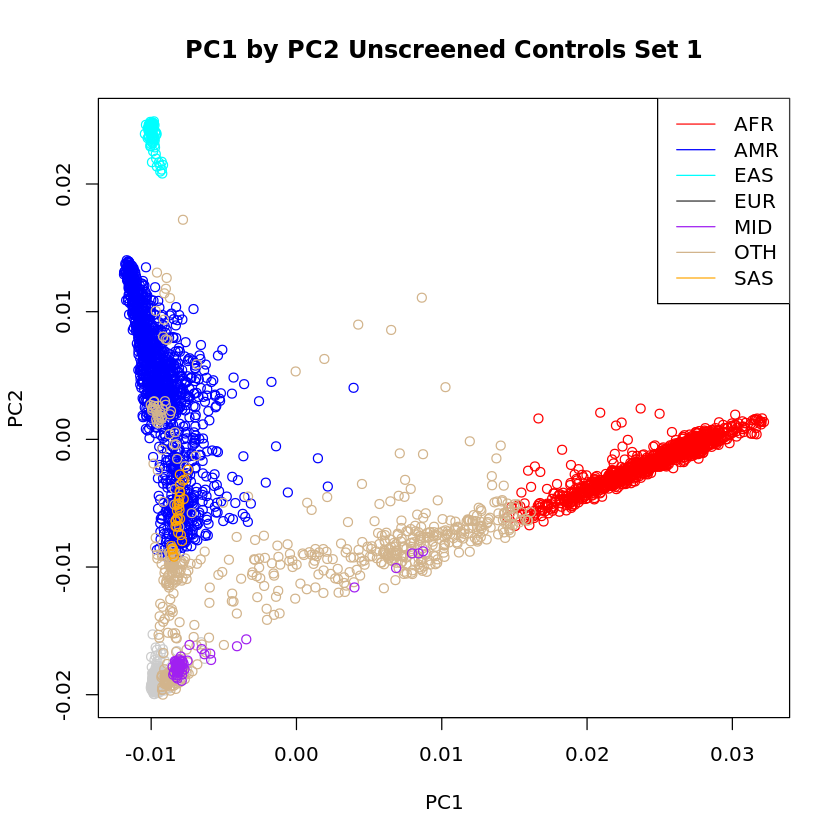

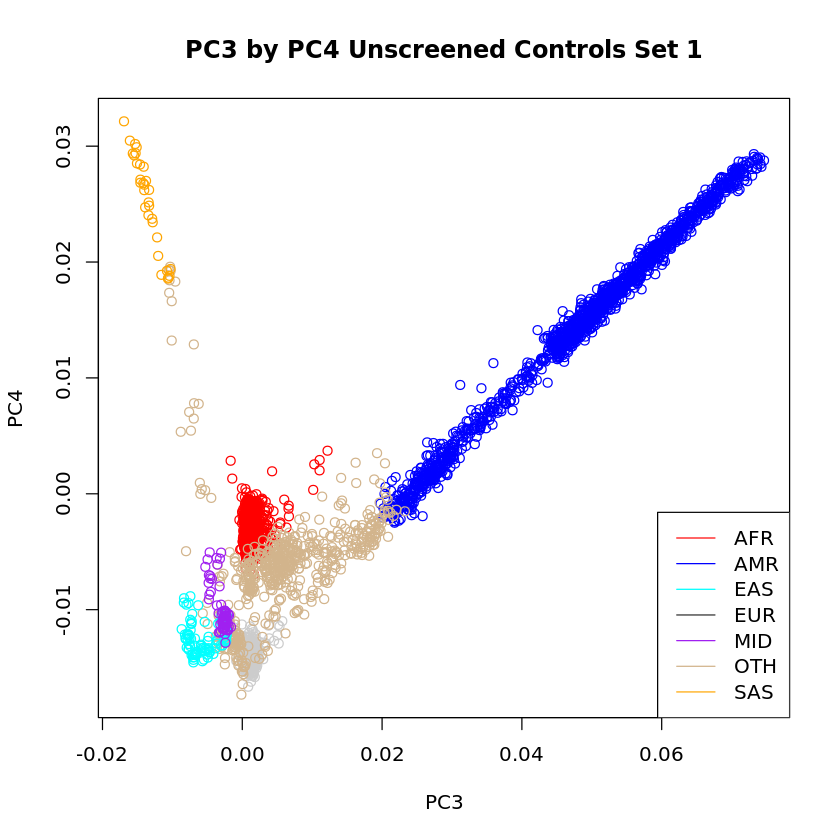

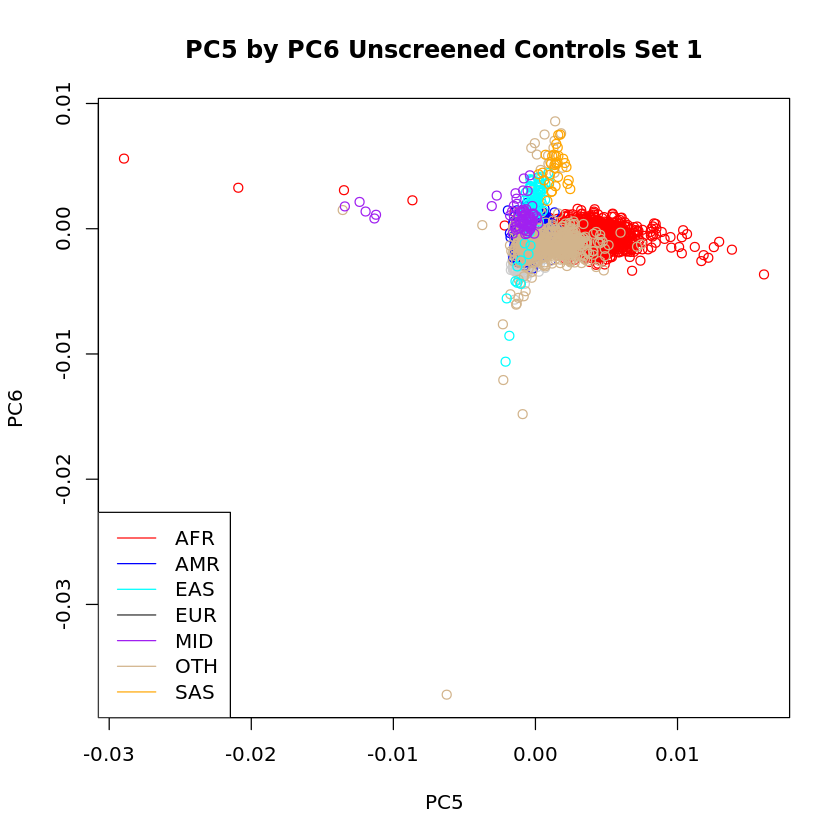

In [137]:
subset.dt <- unscreened.dt[unscreened.dt$person_id %in% unscreened.ids1]
plot(subset.dt$PC1,subset.dt$PC2,type="n",main="PC1 by PC2 Unscreened Controls Set 1", xlab="PC1", ylab="PC2")
points(subset.dt$PC1[subset.dt$my.ancestry3=="EUR"],subset.dt$PC2[subset.dt$my.ancestry3=="EUR"],pty=2,col="gray80")
points(subset.dt$PC1[subset.dt$my.ancestry3=="AFR"],subset.dt$PC2[subset.dt$my.ancestry3=="AFR"],pty=2,col="red")
points(subset.dt$PC1[subset.dt$my.ancestry3=="AMR"],subset.dt$PC2[subset.dt$my.ancestry3=="AMR"],pty=2,col="blue")
points(subset.dt$PC1[subset.dt$my.ancestry3=="OTH"],subset.dt$PC2[subset.dt$my.ancestry3=="OTH"],pty=2,col="tan")
points(subset.dt$PC1[subset.dt$my.ancestry3=="EAS"],subset.dt$PC2[subset.dt$my.ancestry3=="EAS"],pty=2,col="cyan")
points(subset.dt$PC1[subset.dt$my.ancestry3=="SAS"],subset.dt$PC2[subset.dt$my.ancestry3=="SAS"],pty=2,col="orange")
points(subset.dt$PC1[subset.dt$my.ancestry3=="MID"],subset.dt$PC2[subset.dt$my.ancestry3=="MID"],pty=2,col="purple")
legend("topright",legend=c("AFR","AMR","EAS","EUR","MID","OTH","SAS"),
       col=c("red","blue","cyan","gray20","purple","tan","orange"),lty=1)

plot(subset.dt$PC3,subset.dt$PC4,type="n",main="PC3 by PC4 Unscreened Controls Set 1", xlab="PC3", ylab="PC4")
points(subset.dt$PC3[subset.dt$my.ancestry3=="EUR"],subset.dt$PC4[subset.dt$my.ancestry3=="EUR"],pty=2,col="gray80")
points(subset.dt$PC3[subset.dt$my.ancestry3=="AFR"],subset.dt$PC4[subset.dt$my.ancestry3=="AFR"],pty=2,col="red")
points(subset.dt$PC3[subset.dt$my.ancestry3=="AMR"],subset.dt$PC4[subset.dt$my.ancestry3=="AMR"],pty=2,col="blue")
points(subset.dt$PC3[subset.dt$my.ancestry3=="OTH"],subset.dt$PC4[subset.dt$my.ancestry3=="OTH"],pty=2,col="tan")
points(subset.dt$PC3[subset.dt$my.ancestry3=="EAS"],subset.dt$PC4[subset.dt$my.ancestry3=="EAS"],pty=2,col="cyan")
points(subset.dt$PC3[subset.dt$my.ancestry3=="SAS"],subset.dt$PC4[subset.dt$my.ancestry3=="SAS"],pty=2,col="orange")
points(subset.dt$PC3[subset.dt$my.ancestry3=="MID"],subset.dt$PC4[subset.dt$my.ancestry3=="MID"],pty=2,col="purple")
legend("bottomright",legend=c("AFR","AMR","EAS","EUR","MID","OTH","SAS"),
       col=c("red","blue","cyan","gray20","purple","tan","orange"),lty=1)

plot(subset.dt$PC5,subset.dt$PC6,type="n",main="PC5 by PC6 Unscreened Controls Set 1", xlab="PC5", ylab="PC6")
points(subset.dt$PC5[subset.dt$my.ancestry3=="EUR"],subset.dt$PC6[subset.dt$my.ancestry3=="EUR"],pty=2,col="gray80")
points(subset.dt$PC5[subset.dt$my.ancestry3=="AFR"],subset.dt$PC6[subset.dt$my.ancestry3=="AFR"],pty=2,col="red")
points(subset.dt$PC5[subset.dt$my.ancestry3=="AMR"],subset.dt$PC6[subset.dt$my.ancestry3=="AMR"],pty=2,col="blue")
points(subset.dt$PC5[subset.dt$my.ancestry3=="OTH"],subset.dt$PC6[subset.dt$my.ancestry3=="OTH"],pty=2,col="tan")
points(subset.dt$PC5[subset.dt$my.ancestry3=="EAS"],subset.dt$PC6[subset.dt$my.ancestry3=="EAS"],pty=2,col="cyan")
points(subset.dt$PC5[subset.dt$my.ancestry3=="SAS"],subset.dt$PC6[subset.dt$my.ancestry3=="SAS"],pty=2,col="orange")
points(subset.dt$PC5[subset.dt$my.ancestry3=="MID"],subset.dt$PC6[subset.dt$my.ancestry3=="MID"],pty=2,col="purple")
legend("bottomleft",legend=c("AFR","AMR","EAS","EUR","MID","OTH","SAS"),
       col=c("red","blue","cyan","gray20","purple","tan","orange"),lty=1)

In [138]:
# get a purely random sample and see how it looks
unscreened.ids2 <- sample(unscreened.dt$person_id,length(ref.merge.dt$person_id))
length(unscreened.ids2)
summary(as.factor(unscreened.dt$my.ancestry3[unscreened.dt$person_id %in% unscreened.ids2]))

[1] 4151

AFR  AMR  EAS  EUR  MID  OTH  SAS 
 969  425   86 1820  155  665   31

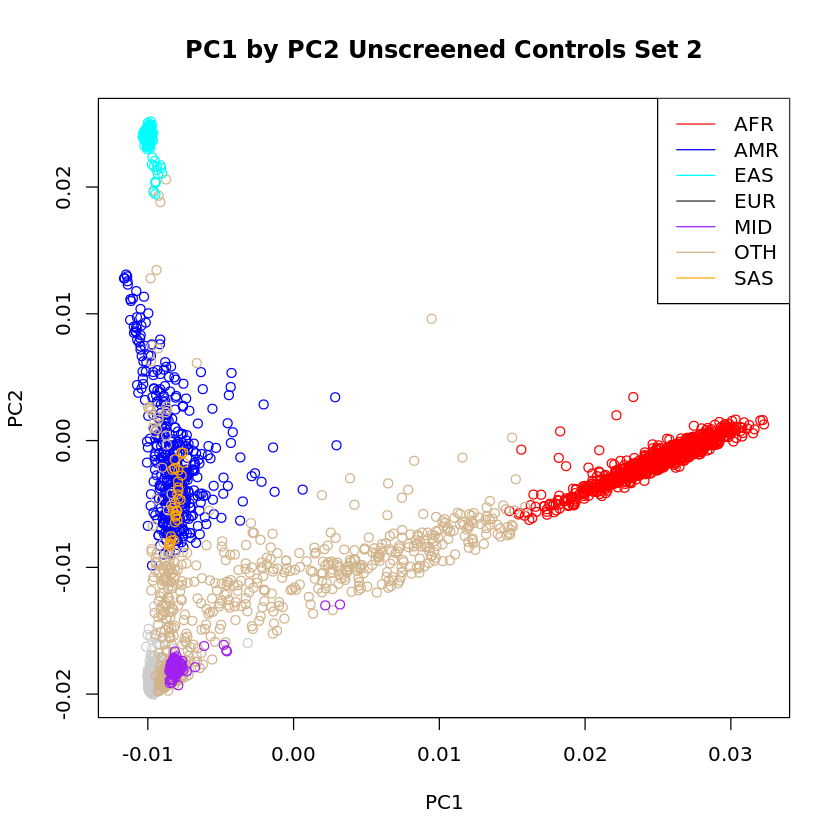

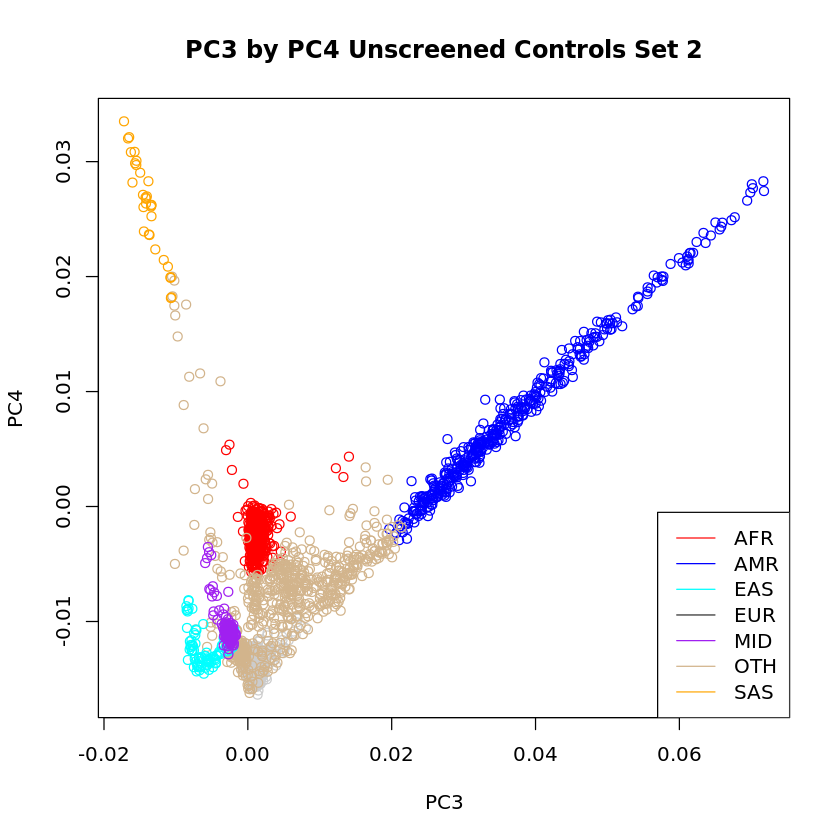

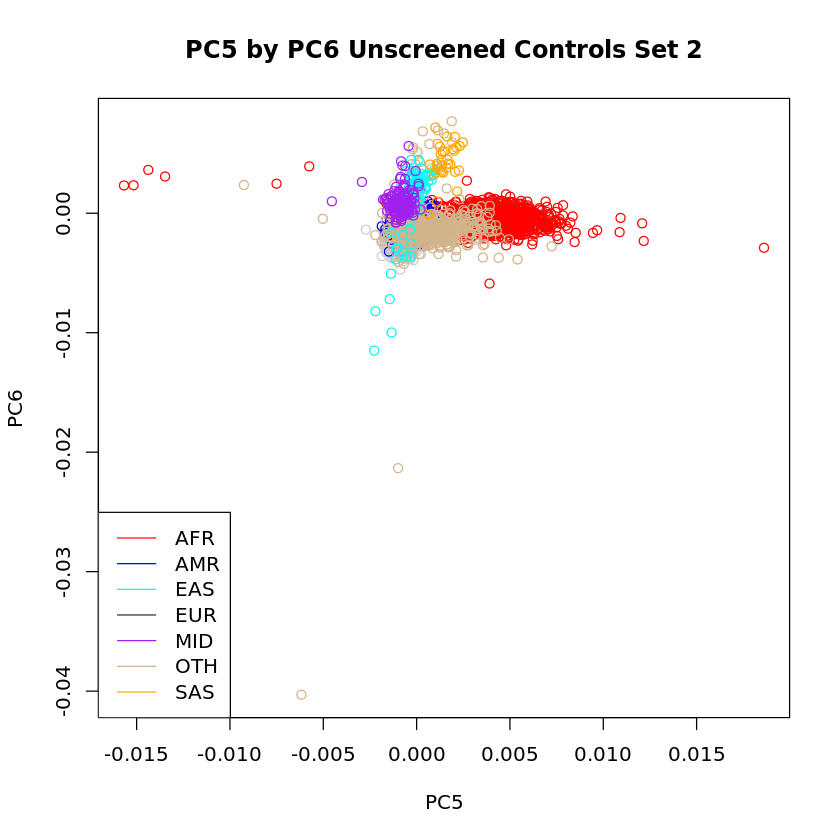

In [139]:
subset.dt <- unscreened.dt[unscreened.dt$person_id %in% unscreened.ids2]
plot(subset.dt$PC1,subset.dt$PC2,type="n",main="PC1 by PC2 Unscreened Controls Set 2", xlab="PC1", ylab="PC2")
points(subset.dt$PC1[subset.dt$my.ancestry3=="EUR"],subset.dt$PC2[subset.dt$my.ancestry3=="EUR"],pty=2,col="gray80")
points(subset.dt$PC1[subset.dt$my.ancestry3=="AFR"],subset.dt$PC2[subset.dt$my.ancestry3=="AFR"],pty=2,col="red")
points(subset.dt$PC1[subset.dt$my.ancestry3=="AMR"],subset.dt$PC2[subset.dt$my.ancestry3=="AMR"],pty=2,col="blue")
points(subset.dt$PC1[subset.dt$my.ancestry3=="OTH"],subset.dt$PC2[subset.dt$my.ancestry3=="OTH"],pty=2,col="tan")
points(subset.dt$PC1[subset.dt$my.ancestry3=="EAS"],subset.dt$PC2[subset.dt$my.ancestry3=="EAS"],pty=2,col="cyan")
points(subset.dt$PC1[subset.dt$my.ancestry3=="SAS"],subset.dt$PC2[subset.dt$my.ancestry3=="SAS"],pty=2,col="orange")
points(subset.dt$PC1[subset.dt$my.ancestry3=="MID"],subset.dt$PC2[subset.dt$my.ancestry3=="MID"],pty=2,col="purple")
legend("topright",legend=c("AFR","AMR","EAS","EUR","MID","OTH","SAS"),
       col=c("red","blue","cyan","gray20","purple","tan","orange"),lty=1)

plot(subset.dt$PC3,subset.dt$PC4,type="n",main="PC3 by PC4 Unscreened Controls Set 2", xlab="PC3", ylab="PC4")
points(subset.dt$PC3[subset.dt$my.ancestry3=="EUR"],subset.dt$PC4[subset.dt$my.ancestry3=="EUR"],pty=2,col="gray80")
points(subset.dt$PC3[subset.dt$my.ancestry3=="AFR"],subset.dt$PC4[subset.dt$my.ancestry3=="AFR"],pty=2,col="red")
points(subset.dt$PC3[subset.dt$my.ancestry3=="AMR"],subset.dt$PC4[subset.dt$my.ancestry3=="AMR"],pty=2,col="blue")
points(subset.dt$PC3[subset.dt$my.ancestry3=="OTH"],subset.dt$PC4[subset.dt$my.ancestry3=="OTH"],pty=2,col="tan")
points(subset.dt$PC3[subset.dt$my.ancestry3=="EAS"],subset.dt$PC4[subset.dt$my.ancestry3=="EAS"],pty=2,col="cyan")
points(subset.dt$PC3[subset.dt$my.ancestry3=="SAS"],subset.dt$PC4[subset.dt$my.ancestry3=="SAS"],pty=2,col="orange")
points(subset.dt$PC3[subset.dt$my.ancestry3=="MID"],subset.dt$PC4[subset.dt$my.ancestry3=="MID"],pty=2,col="purple")
legend("bottomright",legend=c("AFR","AMR","EAS","EUR","MID","OTH","SAS"),
       col=c("red","blue","cyan","gray20","purple","tan","orange"),lty=1)

plot(subset.dt$PC5,subset.dt$PC6,type="n",main="PC5 by PC6 Unscreened Controls Set 2", xlab="PC5", ylab="PC6")
points(subset.dt$PC5[subset.dt$my.ancestry3=="EUR"],subset.dt$PC6[subset.dt$my.ancestry3=="EUR"],pty=2,col="gray80")
points(subset.dt$PC5[subset.dt$my.ancestry3=="AFR"],subset.dt$PC6[subset.dt$my.ancestry3=="AFR"],pty=2,col="red")
points(subset.dt$PC5[subset.dt$my.ancestry3=="AMR"],subset.dt$PC6[subset.dt$my.ancestry3=="AMR"],pty=2,col="blue")
points(subset.dt$PC5[subset.dt$my.ancestry3=="OTH"],subset.dt$PC6[subset.dt$my.ancestry3=="OTH"],pty=2,col="tan")
points(subset.dt$PC5[subset.dt$my.ancestry3=="EAS"],subset.dt$PC6[subset.dt$my.ancestry3=="EAS"],pty=2,col="cyan")
points(subset.dt$PC5[subset.dt$my.ancestry3=="SAS"],subset.dt$PC6[subset.dt$my.ancestry3=="SAS"],pty=2,col="orange")
points(subset.dt$PC5[subset.dt$my.ancestry3=="MID"],subset.dt$PC6[subset.dt$my.ancestry3=="MID"],pty=2,col="purple")
legend("bottomleft",legend=c("AFR","AMR","EAS","EUR","MID","OTH","SAS"),
       col=c("red","blue","cyan","gray20","purple","tan","orange"),lty=1)

In [140]:
subset.dt <- unscreened.dt[unscreened.dt$person_id %in% unscreened.ids1]
fit.broad.aou1 <- broad.adjust(data.pred=subset.dt,data.apply=merge2.dt)

In [141]:
merge2.dt[,PRS.BR.AOU1:=fit.broad.aou1[[1]]]

In [142]:
# get means and s.d. into a table
PRS.BR.AOU1.means <- c(mean(merge2.dt$PRS.BR.AOU1[merge2.dt$my.ancestry3=="AFR"]),
               mean(merge2.dt$PRS.BR.AOU1[merge2.dt$my.ancestry3=="AMR"]),
               mean(merge2.dt$PRS.BR.AOU1[merge2.dt$my.ancestry3=="EAS"]),
               mean(merge2.dt$PRS.BR.AOU1[merge2.dt$my.ancestry3=="EUR"]),
               mean(merge2.dt$PRS.BR.AOU1[merge2.dt$my.ancestry3=="MID"]),
               mean(merge2.dt$PRS.BR.AOU1[merge2.dt$my.ancestry3=="SAS"]),
               mean(merge2.dt$PRS.BR.AOU1[merge2.dt$my.ancestry3=="OTH"]))


PRS.BR.AOU1.sds <- c(sd(merge2.dt$PRS.BR.AOU1[merge2.dt$my.ancestry3=="AFR"]),
               sd(merge2.dt$PRS.BR.AOU1[merge2.dt$my.ancestry3=="AMR"]),
               sd(merge2.dt$PRS.BR.AOU1[merge2.dt$my.ancestry3=="EAS"]),
               sd(merge2.dt$PRS.BR.AOU1[merge2.dt$my.ancestry3=="EUR"]),
               sd(merge2.dt$PRS.BR.AOU1[merge2.dt$my.ancestry3=="MID"]),
               sd(merge2.dt$PRS.BR.AOU1[merge2.dt$my.ancestry3=="SAS"]),
               sd(merge2.dt$PRS.BR.AOU1[merge2.dt$my.ancestry3=="OTH"]))

sample.size <- c(length(merge2.dt$PRS.BR.AOU1[merge2.dt$my.ancestry3=="AFR"]),
               length(merge2.dt$PRS.BR.AOU1[merge2.dt$my.ancestry3=="AMR"]),
               length(merge2.dt$PRS.BR.AOU1[merge2.dt$my.ancestry3=="EAS"]),
               length(merge2.dt$PRS.BR.AOU1[merge2.dt$my.ancestry3=="EUR"]),
               length(merge2.dt$PRS.BR.AOU1[merge2.dt$my.ancestry3=="MID"]),
               length(merge2.dt$PRS.BR.AOU1[merge2.dt$my.ancestry3=="SAS"]),
               length(merge2.dt$PRS.BR.AOU1[merge2.dt$my.ancestry3=="OTH"]))

ANC <- c("AFR","AMR","EAS","EUR","MID","SAS","OTH")
dist.dt <- data.table(cbind(ANC,sample.size,round(PRS.BR.AOU1.means,2),round(PRS.BR.AOU1.sds,2)))
setnames(dist.dt,c("ANC","N","mean","SD"))

In [143]:
(BR.AOU1.dist.dt <- dist.dt)

ANC,N,mean,SD
<chr>,<chr>,<chr>,<chr>
AFR,22385,0.01,0.99
AMR,9382,-0.03,1
EAS,2069,-0.01,0.95
EUR,44099,0.1,0.97
MID,4056,-0.53,0.97
SAS,760,0.28,0.98
OTH,15505,-0.14,1


In [144]:
subset.dt <- unscreened.dt[unscreened.dt$person_id %in% unscreened.ids2]
fit.broad.aou2 <- broad.adjust(data.pred=subset.dt,data.apply=merge2.dt)

In [145]:
merge2.dt[,PRS.BR.AOU2:=fit.broad.aou2[[1]]]

In [146]:
# get means and s.d. into a table
PRS.BR.AOU2.means <- c(mean(merge2.dt$PRS.BR.AOU2[merge2.dt$my.ancestry3=="AFR"]),
               mean(merge2.dt$PRS.BR.AOU2[merge2.dt$my.ancestry3=="AMR"]),
               mean(merge2.dt$PRS.BR.AOU2[merge2.dt$my.ancestry3=="EAS"]),
               mean(merge2.dt$PRS.BR.AOU2[merge2.dt$my.ancestry3=="EUR"]),
               mean(merge2.dt$PRS.BR.AOU2[merge2.dt$my.ancestry3=="MID"]),
               mean(merge2.dt$PRS.BR.AOU2[merge2.dt$my.ancestry3=="SAS"]),
               mean(merge2.dt$PRS.BR.AOU2[merge2.dt$my.ancestry3=="OTH"]))


PRS.BR.AOU2.sds <- c(sd(merge2.dt$PRS.BR.AOU2[merge2.dt$my.ancestry3=="AFR"]),
               sd(merge2.dt$PRS.BR.AOU2[merge2.dt$my.ancestry3=="AMR"]),
               sd(merge2.dt$PRS.BR.AOU2[merge2.dt$my.ancestry3=="EAS"]),
               sd(merge2.dt$PRS.BR.AOU2[merge2.dt$my.ancestry3=="EUR"]),
               sd(merge2.dt$PRS.BR.AOU2[merge2.dt$my.ancestry3=="MID"]),
               sd(merge2.dt$PRS.BR.AOU2[merge2.dt$my.ancestry3=="SAS"]),
               sd(merge2.dt$PRS.BR.AOU2[merge2.dt$my.ancestry3=="OTH"]))

sample.size <- c(length(merge2.dt$PRS.BR.AOU2[merge2.dt$my.ancestry3=="AFR"]),
               length(merge2.dt$PRS.BR.AOU2[merge2.dt$my.ancestry3=="AMR"]),
               length(merge2.dt$PRS.BR.AOU2[merge2.dt$my.ancestry3=="EAS"]),
               length(merge2.dt$PRS.BR.AOU2[merge2.dt$my.ancestry3=="EUR"]),
               length(merge2.dt$PRS.BR.AOU2[merge2.dt$my.ancestry3=="MID"]),
               length(merge2.dt$PRS.BR.AOU2[merge2.dt$my.ancestry3=="SAS"]),
               length(merge2.dt$PRS.BR.AOU2[merge2.dt$my.ancestry3=="OTH"]))

ANC <- c("AFR","AMR","EAS","EUR","MID","SAS","OTH")
dist.dt <- data.table(cbind(ANC,sample.size,round(PRS.BR.AOU2.means,2),round(PRS.BR.AOU2.sds,2)))
setnames(dist.dt,c("ANC","N","mean","SD"))

In [147]:
(BR.AOU2.dist.dt <- dist.dt)

ANC,N,mean,SD
<chr>,<chr>,<chr>,<chr>
AFR,22385,0,0.99
AMR,9382,-0.08,1.01
EAS,2069,0.13,1.04
EUR,44099,0.11,0.98
MID,4056,-0.5,0.97
SAS,760,0.25,0.93
OTH,15505,-0.14,1.01


In [148]:
# Using all of AOU
fit.broad.aou.all <- broad.adjust(data.pred=merge2.dt,data.apply=merge2.dt)

In [149]:
merge2.dt[,PRS.BR.AOU.ALL:=fit.broad.aou.all[[1]]]

In [150]:
# get means and s.d. into a table
PRS.BR.AOU.ALL.means <- c(mean(merge2.dt$PRS.BR.AOU.ALL[merge2.dt$my.ancestry3=="AFR"]),
               mean(merge2.dt$PRS.BR.AOU.ALL[merge2.dt$my.ancestry3=="AMR"]),
               mean(merge2.dt$PRS.BR.AOU.ALL[merge2.dt$my.ancestry3=="EAS"]),
               mean(merge2.dt$PRS.BR.AOU.ALL[merge2.dt$my.ancestry3=="EUR"]),
               mean(merge2.dt$PRS.BR.AOU.ALL[merge2.dt$my.ancestry3=="MID"]),
               mean(merge2.dt$PRS.BR.AOU.ALL[merge2.dt$my.ancestry3=="SAS"]),
               mean(merge2.dt$PRS.BR.AOU.ALL[merge2.dt$my.ancestry3=="OTH"]))


PRS.BR.AOU.ALL.sds <- c(sd(merge2.dt$PRS.BR.AOU.ALL[merge2.dt$my.ancestry3=="AFR"]),
               sd(merge2.dt$PRS.BR.AOU.ALL[merge2.dt$my.ancestry3=="AMR"]),
               sd(merge2.dt$PRS.BR.AOU.ALL[merge2.dt$my.ancestry3=="EAS"]),
               sd(merge2.dt$PRS.BR.AOU.ALL[merge2.dt$my.ancestry3=="EUR"]),
               sd(merge2.dt$PRS.BR.AOU.ALL[merge2.dt$my.ancestry3=="MID"]),
               sd(merge2.dt$PRS.BR.AOU.ALL[merge2.dt$my.ancestry3=="SAS"]),
               sd(merge2.dt$PRS.BR.AOU.ALL[merge2.dt$my.ancestry3=="OTH"]))

sample.size <- c(length(merge2.dt$PRS.BR.AOU.ALL[merge2.dt$my.ancestry3=="AFR"]),
               length(merge2.dt$PRS.BR.AOU.ALL[merge2.dt$my.ancestry3=="AMR"]),
               length(merge2.dt$PRS.BR.AOU.ALL[merge2.dt$my.ancestry3=="EAS"]),
               length(merge2.dt$PRS.BR.AOU.ALL[merge2.dt$my.ancestry3=="EUR"]),
               length(merge2.dt$PRS.BR.AOU.ALL[merge2.dt$my.ancestry3=="MID"]),
               length(merge2.dt$PRS.BR.AOU.ALL[merge2.dt$my.ancestry3=="SAS"]),
               length(merge2.dt$PRS.BR.AOU.ALL[merge2.dt$my.ancestry3=="OTH"]))

ANC <- c("AFR","AMR","EAS","EUR","MID","SAS","OTH")
dist.dt <- data.table(cbind(ANC,sample.size,round(PRS.BR.AOU.ALL.means,2),round(PRS.BR.AOU.ALL.sds,2)))
setnames(dist.dt,c("ANC","N","mean","SD"))

In [151]:
(BR.AOU.ALL.dist.dt <- dist.dt)

ANC,N,mean,SD
<chr>,<chr>,<chr>,<chr>
AFR,22385,0.02,1
AMR,9382,-0.02,1
EAS,2069,0,1
EUR,44099,0.09,0.98
MID,4056,-0.52,0.97
SAS,760,0.35,0.91
OTH,15505,-0.14,1.01


In [152]:
#sample from the PC grid
#start with just first two PCs to make sure this works
#unscreened.raster <- unscreened.dt[,list(PC1,PC2,PC3,PC4,PC5,person_id)]
#coordinates(unscreened.raster) <- ~ PC1 + PC2
#str(unscreened.raster)

In [153]:
#(check <- spsample(unscreened.raster, 5, "random"))
#str(check)

In [154]:
#check.dt <- as.data.table(check)
#setnames(check.dt,c("PC1","PC2"))
#setkeyv(check.dt,c("PC1","PC2"))
#setkeyv(unscreened.dt,c("PC1","PC2"))
#unscreened.dt[check.dt]

# BROAD adjustment using AoU unscreened controls and percent ancestry

In [155]:
subset.dt <- unscreened.dt[unscreened.dt$person_id %in% unscreened.ids1]
fit.broad.anc.aou1 <- broad.adjust.anc(data.pred=subset.dt,data.apply=merge2.dt)

In [156]:
merge2.dt[,PRS.BR.ANC.AOU1:=fit.broad.anc.aou1[[1]]]

In [157]:
# get means and s.d. into a table
PRS.BR.ANC.AOU1.means <- c(mean(merge2.dt$PRS.BR.ANC.AOU1[merge2.dt$my.ancestry3=="AFR"]),
               mean(merge2.dt$PRS.BR.ANC.AOU1[merge2.dt$my.ancestry3=="AMR"]),
               mean(merge2.dt$PRS.BR.ANC.AOU1[merge2.dt$my.ancestry3=="EAS"]),
               mean(merge2.dt$PRS.BR.ANC.AOU1[merge2.dt$my.ancestry3=="EUR"]),
               mean(merge2.dt$PRS.BR.ANC.AOU1[merge2.dt$my.ancestry3=="MID"]),
               mean(merge2.dt$PRS.BR.ANC.AOU1[merge2.dt$my.ancestry3=="SAS"]),
               mean(merge2.dt$PRS.BR.ANC.AOU1[merge2.dt$my.ancestry3=="OTH"]))


PRS.BR.ANC.AOU1.sds <- c(sd(merge2.dt$PRS.BR.ANC.AOU1[merge2.dt$my.ancestry3=="AFR"]),
               sd(merge2.dt$PRS.BR.ANC.AOU1[merge2.dt$my.ancestry3=="AMR"]),
               sd(merge2.dt$PRS.BR.ANC.AOU1[merge2.dt$my.ancestry3=="EAS"]),
               sd(merge2.dt$PRS.BR.ANC.AOU1[merge2.dt$my.ancestry3=="EUR"]),
               sd(merge2.dt$PRS.BR.ANC.AOU1[merge2.dt$my.ancestry3=="MID"]),
               sd(merge2.dt$PRS.BR.ANC.AOU1[merge2.dt$my.ancestry3=="SAS"]),
               sd(merge2.dt$PRS.BR.ANC.AOU1[merge2.dt$my.ancestry3=="OTH"]))

sample.size <- c(length(merge2.dt$PRS.BR.ANC.AOU1[merge2.dt$my.ancestry3=="AFR"]),
               length(merge2.dt$PRS.BR.ANC.AOU1[merge2.dt$my.ancestry3=="AMR"]),
               length(merge2.dt$PRS.BR.ANC.AOU1[merge2.dt$my.ancestry3=="EAS"]),
               length(merge2.dt$PRS.BR.ANC.AOU1[merge2.dt$my.ancestry3=="EUR"]),
               length(merge2.dt$PRS.BR.ANC.AOU1[merge2.dt$my.ancestry3=="MID"]),
               length(merge2.dt$PRS.BR.ANC.AOU1[merge2.dt$my.ancestry3=="SAS"]),
               length(merge2.dt$PRS.BR.ANC.AOU1[merge2.dt$my.ancestry3=="OTH"]))

ANC <- c("AFR","AMR","EAS","EUR","MID","SAS","OTH")
dist.dt <- data.table(cbind(ANC,sample.size,round(PRS.BR.ANC.AOU1.means,2),round(PRS.BR.ANC.AOU1.sds,2)))
setnames(dist.dt,c("ANC","N","mean","SD"))

In [158]:
(BR.ANC.AOU1.dist.dt <- dist.dt)

ANC,N,mean,SD
<chr>,<chr>,<chr>,<chr>
AFR,22385,-0.01,0.99
AMR,9382,0,1.01
EAS,2069,-0.02,0.95
EUR,44099,0.01,1
MID,4056,0.04,0.93
SAS,760,0.14,1.05
OTH,15505,-0.03,0.99


In [159]:
fit.broad.anc.aou1[[2]]


Call:
lm(formula = PRS ~ AFR + AMR + EAS + MID + SAS, data = data.pred)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6910 -0.3086  0.0013  0.3063  1.5187 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.37774    0.01552  24.338  < 2e-16 ***
AFR          0.03096    0.02404   1.288   0.1979    
AMR         -0.08453    0.02025  -4.175 3.05e-05 ***
EAS          0.02797    0.05132   0.545   0.5858    
MID         -0.45607    0.06285  -7.256 4.73e-13 ***
SAS         -0.19792    0.07883  -2.511   0.0121 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4482 on 4145 degrees of freedom
Multiple R-squared:  0.02231,	Adjusted R-squared:  0.02113 
F-statistic: 18.92 on 5 and 4145 DF,  p-value: < 2.2e-16


In [160]:
subset.dt <- unscreened.dt[unscreened.dt$person_id %in% unscreened.ids2]
fit.broad.anc.aou2 <- broad.adjust.anc(data.pred=subset.dt,data.apply=merge2.dt)

In [161]:
merge2.dt[,PRS.BR.ANC.AOU2:=fit.broad.anc.aou2[[1]]]

In [162]:
# get means and s.d. into a table
PRS.BR.ANC.AOU2.means <- c(mean(merge2.dt$PRS.BR.ANC.AOU2[merge2.dt$my.ancestry3=="AFR"]),
               mean(merge2.dt$PRS.BR.ANC.AOU2[merge2.dt$my.ancestry3=="AMR"]),
               mean(merge2.dt$PRS.BR.ANC.AOU2[merge2.dt$my.ancestry3=="EAS"]),
               mean(merge2.dt$PRS.BR.ANC.AOU2[merge2.dt$my.ancestry3=="EUR"]),
               mean(merge2.dt$PRS.BR.ANC.AOU2[merge2.dt$my.ancestry3=="MID"]),
               mean(merge2.dt$PRS.BR.ANC.AOU2[merge2.dt$my.ancestry3=="SAS"]),
               mean(merge2.dt$PRS.BR.ANC.AOU2[merge2.dt$my.ancestry3=="OTH"]))


PRS.BR.ANC.AOU2.sds <- c(sd(merge2.dt$PRS.BR.ANC.AOU2[merge2.dt$my.ancestry3=="AFR"]),
               sd(merge2.dt$PRS.BR.ANC.AOU2[merge2.dt$my.ancestry3=="AMR"]),
               sd(merge2.dt$PRS.BR.ANC.AOU2[merge2.dt$my.ancestry3=="EAS"]),
               sd(merge2.dt$PRS.BR.ANC.AOU2[merge2.dt$my.ancestry3=="EUR"]),
               sd(merge2.dt$PRS.BR.ANC.AOU2[merge2.dt$my.ancestry3=="MID"]),
               sd(merge2.dt$PRS.BR.ANC.AOU2[merge2.dt$my.ancestry3=="SAS"]),
               sd(merge2.dt$PRS.BR.ANC.AOU2[merge2.dt$my.ancestry3=="OTH"]))

sample.size <- c(length(merge2.dt$PRS.BR.ANC.AOU2[merge2.dt$my.ancestry3=="AFR"]),
               length(merge2.dt$PRS.BR.ANC.AOU2[merge2.dt$my.ancestry3=="AMR"]),
               length(merge2.dt$PRS.BR.ANC.AOU2[merge2.dt$my.ancestry3=="EAS"]),
               length(merge2.dt$PRS.BR.ANC.AOU2[merge2.dt$my.ancestry3=="EUR"]),
               length(merge2.dt$PRS.BR.ANC.AOU2[merge2.dt$my.ancestry3=="MID"]),
               length(merge2.dt$PRS.BR.ANC.AOU2[merge2.dt$my.ancestry3=="SAS"]),
               length(merge2.dt$PRS.BR.ANC.AOU2[merge2.dt$my.ancestry3=="OTH"]))

ANC <- c("AFR","AMR","EAS","EUR","MID","SAS","OTH")
dist.dt <- data.table(cbind(ANC,sample.size,round(PRS.BR.ANC.AOU2.means,2),round(PRS.BR.ANC.AOU2.sds,2)))
setnames(dist.dt,c("ANC","N","mean","SD"))

In [163]:
(BR.ANC.AOU2.dist.dt <- dist.dt)

ANC,N,mean,SD
<chr>,<chr>,<chr>,<chr>
AFR,22385,-0.02,0.99
AMR,9382,-0.06,1.02
EAS,2069,0.12,1.03
EUR,44099,0.03,1
MID,4056,0.15,0.99
SAS,760,-0.12,1.09
OTH,15505,-0.01,1.01


In [164]:
fit.broad.anc.aou2[[2]]


Call:
lm(formula = PRS ~ AFR + AMR + EAS + MID + SAS, data = data.pred)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.60220 -0.30876  0.00266  0.30103  1.47568 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.36809    0.01084  33.969   <2e-16 ***
AFR          0.04468    0.02096   2.132   0.0331 *  
AMR         -0.04300    0.02641  -1.628   0.1036    
EAS         -0.03554    0.05123  -0.694   0.4879    
MID         -0.51044    0.04436 -11.506   <2e-16 ***
SAS         -0.06412    0.07897  -0.812   0.4169    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4546 on 4145 degrees of freedom
Multiple R-squared:  0.03674,	Adjusted R-squared:  0.03558 
F-statistic: 31.62 on 5 and 4145 DF,  p-value: < 2.2e-16


# Tabulate Mean(SD) adjusted PRS

In [165]:
#Update the column names
#setkeyv on ANC and N
# add parentheses around SD and make a single column for each table


names2fix <- c("mean","SD")
#raw.dist.dt
setnames(PC.dist.dt,names2fix,paste0("PC_",names2fix))
setnames(ANC.dist.dt,names2fix,paste0("ANC_",names2fix))
setnames(BR.REF.dist.dt,names2fix,paste0("BR.REF_",names2fix))
setnames(BR.AOU1.dist.dt,names2fix,paste0("BR.AOU1_",names2fix))
setnames(BR.AOU2.dist.dt,names2fix,paste0("BR.AOU2_",names2fix))
setnames(BR.AOU.ALL.dist.dt,names2fix,paste0("BR.AOU_",names2fix))
setnames(BR.ANC.AOU1.dist.dt,names2fix,paste0("BR.ANC1_",names2fix))
setnames(BR.ANC.AOU2.dist.dt,names2fix,paste0("BR.ANC2_",names2fix))

setkeyv(raw.dist.dt, c("ANC", "N"))
setkeyv(PC.dist.dt, c("ANC", "N"))
setkeyv(ANC.dist.dt, c("ANC", "N"))
setkeyv(BR.REF.dist.dt, c("ANC", "N"))
setkeyv(BR.AOU1.dist.dt, c("ANC", "N"))
setkeyv(BR.AOU2.dist.dt, c("ANC", "N"))
setkeyv(BR.AOU.ALL.dist.dt, c("ANC", "N"))
setkeyv(BR.ANC.AOU1.dist.dt, c("ANC", "N"))
setkeyv(BR.ANC.AOU2.dist.dt, c("ANC", "N"))

out.table <- raw.dist.dt[PC.dist.dt]
setkeyv(out.table, c("ANC","N"))
out.table <- out.table[ANC.dist.dt]
setkeyv(out.table, c("ANC","N"))
out.table <- out.table[BR.REF.dist.dt]
setkeyv(out.table, c("ANC","N"))
out.table <- out.table[BR.AOU1.dist.dt]
setkeyv(out.table, c("ANC","N"))
out.table <- out.table[BR.AOU2.dist.dt]
setkeyv(out.table, c("ANC","N"))
out.table <- out.table[BR.ANC.AOU1.dist.dt]
setkeyv(out.table, c("ANC","N"))
out.table <- out.table[BR.ANC.AOU2.dist.dt]
setkeyv(out.table, c("ANC","N"))

(out.table <- out.table[BR.AOU.ALL.dist.dt])

(sd.cols <- names(out.table)[names(out.table) %like% "SD"])
out.table[ ,(sd.cols):=lapply(.SD, addparentheses), .SDcols=sd.cols]
out.table

(as.data.frame(out.table) %>%
    unite(RAW,c(mean,SD),sep="") %>%
    unite(PC,c(PC_mean,PC_SD),sep="") %>%
    unite(ANC_,c(ANC_mean,ANC_SD),sep="") %>%
    unite(BR.REF,c(BR.REF_mean,BR.REF_SD),sep="") %>%
    unite(BR.AOU1,c(BR.AOU1_mean,BR.AOU1_SD),sep="") %>%
    unite(BR.AOU2,c(BR.AOU2_mean,BR.AOU2_SD),sep="") %>%
    unite(BR.ANC1,c(BR.ANC1_mean,BR.ANC1_SD),sep="") %>%
    unite(BR.ANC2,c(BR.ANC2_mean,BR.ANC2_SD),sep="") %>%
    unite(BR.AOU,c(BR.AOU_mean,BR.AOU_SD),sep="") )


ANC,N,mean,SD,PC_mean,PC_SD,ANC_mean,ANC_SD,BR.REF_mean,BR.REF_SD,BR.AOU1_mean,BR.AOU1_SD,BR.AOU2_mean,BR.AOU2_SD,BR.ANC1_mean,BR.ANC1_SD,BR.ANC2_mean,BR.ANC2_SD,BR.AOU_mean,BR.AOU_SD
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AFR,22385,0.4,0.41,0.01,0.41,0,0.41,0.01,1.01,0.01,0.99,0,0.99,-0.01,0.99,-0.02,0.99,0.02,1
AMR,9382,0.29,0.45,-0.01,0.45,0,0.45,0.01,1.01,-0.03,1,-0.08,1.01,0,1.01,-0.06,1.02,-0.02,1
EAS,2069,0.37,0.47,0,0.47,0,0.47,-0.1,1.03,-0.01,0.95,0.13,1.04,-0.02,0.95,0.12,1.03,0,1
EUR,44099,0.38,0.47,0.04,0.47,0,0.47,0.28,0.99,0.1,0.97,0.11,0.98,0.01,1,0.03,1,0.09,0.98
MID,4056,0.05,0.47,-0.25,0.47,0.03,0.47,-0.43,0.99,-0.53,0.97,-0.5,0.97,0.04,0.93,0.15,0.99,-0.52,0.97
OTH,15505,0.27,0.47,-0.07,0.47,-0.01,0.46,-0.03,1.01,-0.14,1,-0.14,1.01,-0.03,0.99,-0.01,1.01,-0.14,1.01
SAS,760,0.25,0.47,0.18,0.47,0.01,0.47,-0.17,1.01,0.28,0.98,0.25,0.93,0.14,1.05,-0.12,1.09,0.35,0.91


[1] "SD"         "PC_SD"      "ANC_SD"     "BR.REF_SD"  "BR.AOU1_SD"
[6] "BR.AOU2_SD" "BR.ANC1_SD" "BR.ANC2_SD" "BR.AOU_SD"

ANC,N,mean,SD,PC_mean,PC_SD,ANC_mean,ANC_SD,BR.REF_mean,BR.REF_SD,BR.AOU1_mean,BR.AOU1_SD,BR.AOU2_mean,BR.AOU2_SD,BR.ANC1_mean,BR.ANC1_SD,BR.ANC2_mean,BR.ANC2_SD,BR.AOU_mean,BR.AOU_SD
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AFR,22385,0.4,(0.41),0.01,(0.41),0,(0.41),0.01,(1.01),0.01,(0.99),0,(0.99),-0.01,(0.99),-0.02,(0.99),0.02,(1)
AMR,9382,0.29,(0.45),-0.01,(0.45),0,(0.45),0.01,(1.01),-0.03,(1),-0.08,(1.01),0,(1.01),-0.06,(1.02),-0.02,(1)
EAS,2069,0.37,(0.47),0,(0.47),0,(0.47),-0.1,(1.03),-0.01,(0.95),0.13,(1.04),-0.02,(0.95),0.12,(1.03),0,(1)
EUR,44099,0.38,(0.47),0.04,(0.47),0,(0.47),0.28,(0.99),0.1,(0.97),0.11,(0.98),0.01,(1),0.03,(1),0.09,(0.98)
MID,4056,0.05,(0.47),-0.25,(0.47),0.03,(0.47),-0.43,(0.99),-0.53,(0.97),-0.5,(0.97),0.04,(0.93),0.15,(0.99),-0.52,(0.97)
OTH,15505,0.27,(0.47),-0.07,(0.47),-0.01,(0.46),-0.03,(1.01),-0.14,(1),-0.14,(1.01),-0.03,(0.99),-0.01,(1.01),-0.14,(1.01)
SAS,760,0.25,(0.47),0.18,(0.47),0.01,(0.47),-0.17,(1.01),0.28,(0.98),0.25,(0.93),0.14,(1.05),-0.12,(1.09),0.35,(0.91)


ANC,N,RAW,PC,ANC_,BR.REF,BR.AOU1,BR.AOU2,BR.ANC1,BR.ANC2,BR.AOU
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AFR,22385,0.4(0.41),0.01(0.41),0(0.41),0.01(1.01),0.01(0.99),0(0.99),-0.01(0.99),-0.02(0.99),0.02(1)
AMR,9382,0.29(0.45),-0.01(0.45),0(0.45),0.01(1.01),-0.03(1),-0.08(1.01),0(1.01),-0.06(1.02),-0.02(1)
EAS,2069,0.37(0.47),0(0.47),0(0.47),-0.1(1.03),-0.01(0.95),0.13(1.04),-0.02(0.95),0.12(1.03),0(1)
EUR,44099,0.38(0.47),0.04(0.47),0(0.47),0.28(0.99),0.1(0.97),0.11(0.98),0.01(1),0.03(1),0.09(0.98)
MID,4056,0.05(0.47),-0.25(0.47),0.03(0.47),-0.43(0.99),-0.53(0.97),-0.5(0.97),0.04(0.93),0.15(0.99),-0.52(0.97)
OTH,15505,0.27(0.47),-0.07(0.47),-0.01(0.46),-0.03(1.01),-0.14(1),-0.14(1.01),-0.03(0.99),-0.01(1.01),-0.14(1.01)
SAS,760,0.25(0.47),0.18(0.47),0.01(0.47),-0.17(1.01),0.28(0.98),0.25(0.93),0.14(1.05),-0.12(1.09),0.35(0.91)


# Output the data set for further analysis

In [ ]:
str(merge2.dt)

In [167]:
merge2.dt[,resid2:=NULL]

In [ ]:
t(merge2.dt[][merge2.dt$person_id=="1022076"])

In [171]:
# write out the file tab delimited because some of the entries have commas in them
#outfile <- "CRC-Nov2021-PRS-adjustments-2023-03-02.tsv"
outfile <- "CRC-PRS-adjustments-2023-03-02.tsv"
write.table(merge2.dt,outfile, row.names=FALSE, quote=FALSE, sep="\t")
#cp.command <- paste0("gsutil -m cp -r ", outfile, " gs://fc-secure-30fdbdfd-a46b-406d-9617-1bc69ae1da9d/alpha3/")
cp.command <- paste0("gsutil -m cp -r ", outfile, "  gs://fc-secure-91b7b957-58d8-4142-b93b-c3a2635f2d78/alpha3/")
system(cp.command, intern=TRUE)

character(0)